# Kode bab 4

In [1]:
import pandas as pd

In [2]:
!mkdir data_elektronik
!mkdir data_pakaian
!mkdir img

In [3]:
data_hp=pd.read_csv("/content/data_elektronik/data_hp.csv")
data_laptop=pd.read_csv("/content/data_elektronik/data_laptop.csv")

In [4]:
total_data_hp=len(data_hp.index)
total_data_laptop=len(data_laptop.index)

In [5]:
total_data_hp,total_data_laptop

(496, 399)

In [6]:
total_data_hp+total_data_laptop

895

## penggabungan data

###Data elektronik

In [7]:
data_elektronik=pd.concat([data_hp,data_laptop],axis=0)

In [8]:
data_elektronik=data_elektronik[["komentar","rating","label"]]

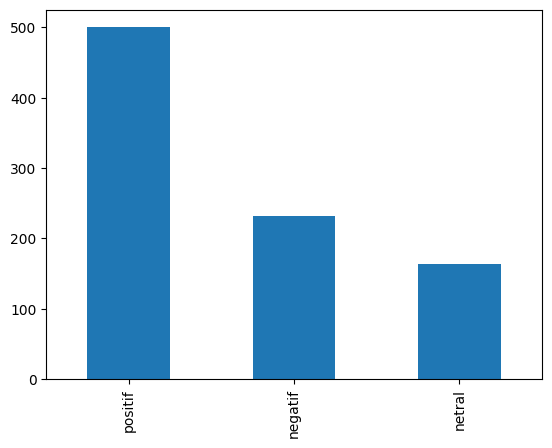

In [9]:
data_elektronik["label"].value_counts().plot.bar();

### Data pakaian

In [10]:
data_pakaian_kaos=pd.read_csv("/content/data_pakaian/data_kaos.csv")
data_pakaian_kemeja=pd.read_csv("/content/data_pakaian/data_kemeja.csv")

In [11]:
data_pakaian=pd.concat([data_pakaian_kaos,data_pakaian_kemeja],axis=0)

In [12]:
data_pakaian=data_pakaian[["komentar","rating","label"]]

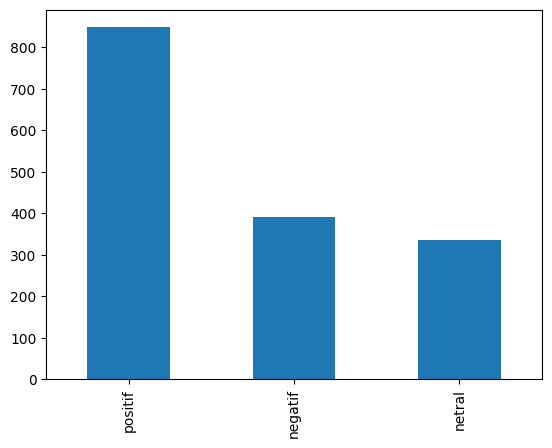

In [13]:
data_pakaian["label"].value_counts().plot.bar();

# Preprocessing text

In [14]:
def caseFolding(text):
  text=text.lower()
  return text

In [15]:
import re
def punc_removal(text):
  text=re.sub(r"[^a-zA-Z]"," ",text)
  return text

In [16]:
# import StemmerFactory class
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemsWords(text):
  text=stemmer.stem(text)
  return text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.6 MB/s eta 0:00:00


In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('stopwords')
stp_indo=stopwords.words('indonesian')
stp_more=["yg","tg"]
def flatten(l):
    """
    Same as
    flat_list = []
    for sublist in l:
    for item in sublist:
        flat_list.append(item)

    Example =[[1,2,3,4,5]] - > [1,2,3,4,5]
    """
    return " ".join([item for sublist in l for item in sublist])

def remove_stop_words(text):
  stp=stp_indo+stp_more
  clean_words = []
  text=text.split()
  perulangan_text=[word for word in text if word not in stp]
  clean_words.append(perulangan_text)
  return flatten(clean_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def preprocessing_text(text):
  text=caseFolding(text)
  text=punc_removal(text)
  text=remove_stop_words(text)
  text=stemsWords(text)
  return text

## data pakaian

In [19]:
data_pakaian["komentar_bersih"]=data_pakaian["komentar"].apply(preprocessing_text)

In [20]:
data_pakaian[["komentar_bersih","label"]]

,komentar_bersih,label
0,mantapsss,positif
1,keren,positif
2,barang ok seeuai peeanan,positif
3,ok,positif
4,model keren,positif
...,...,...
640,ga sesuai deskripsi bagi lengan sempit banget ...,negatif
641,ukur trlalu beda ukur gabisa return,negatif
642,layan jual barang,negatif
643,layan jual barang,negatif


In [21]:
data_pakaian["label"].value_counts()

positif    849
negatif    391
netral     335
Name: label, dtype: int64

## data elektronik

In [22]:
data_elektronik["komentar_bersih"]=data_elektronik["komentar"].apply(preprocessing_text)

In [23]:
data_elektronik[["komentar_bersih","label"]]

,komentar_bersih,label
0,kecoh banget varian klik a c moga awet deh ya ...,positif
1,hp nya bagus parah sdh kotor lengket jd gak di...,positif
2,layan toko bagus kirim lambat,positif
3,siip mantap,positif
4,produk original kirim lumayan cepet coba tp lo...,positif
...,...,...
394,kualitas barang masalah,negatif
395,barang ok customer servicenya rendah sampe nyu...,negatif
396,office nya laku lempar utk telfon bantu suruh ...,negatif
397,kualitas barang masalah,negatif


In [24]:
data_elektronik["label"].value_counts()

positif    500
negatif    232
netral     163
Name: label, dtype: int64

# Wordlcoud

In [25]:
import cv2
from wordcloud import WordCloud

In [26]:
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2023-07-08 05:35:57--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.004s  

2023-07-08 05:35:57 (9.01 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [27]:
originalImage = cv2.imread('img/cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

## Data pakaian

### Negatif

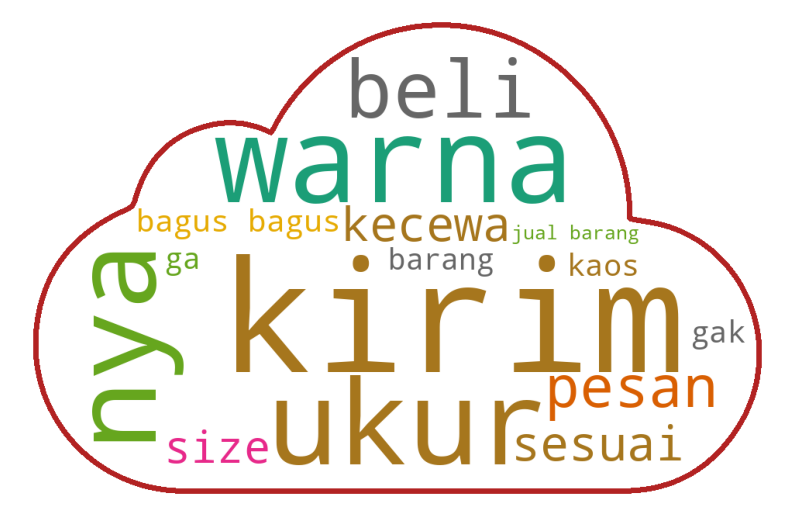

In [28]:
# WordCloud Label negatif data pakaian
import matplotlib.pyplot as plt
pakaian_negatif = data_pakaian[data_pakaian["label"] == "negatif"]
negatif_string = []

for t in pakaian_negatif["komentar_bersih"]:
  negatif_string .append(t)

negatif_string = pd.Series(negatif_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(negatif_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('label_pakaian_negatif.png')
plt.savefig('label_pakaian_negatif.pdf')
plt.show()

### Netral

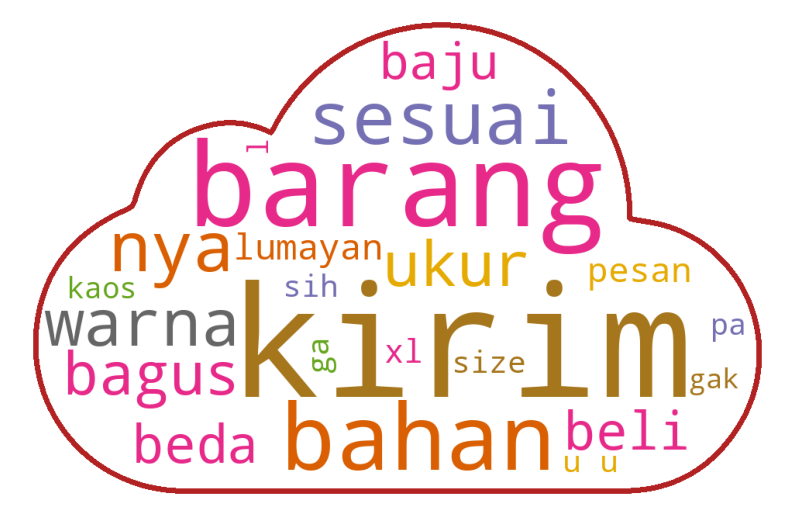

In [29]:
# WordCloud Label negatif data pakaian
import matplotlib.pyplot as plt
pakaian_netral = data_pakaian[data_pakaian["label"] == "netral"]
netral_string = []

for t in pakaian_netral["komentar_bersih"]:
  netral_string .append(t)

netral_string = pd.Series(netral_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(netral_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('label_pakaian_netral.png')
plt.savefig('label_pakaian_netralf.pdf')
plt.show()

### Positif

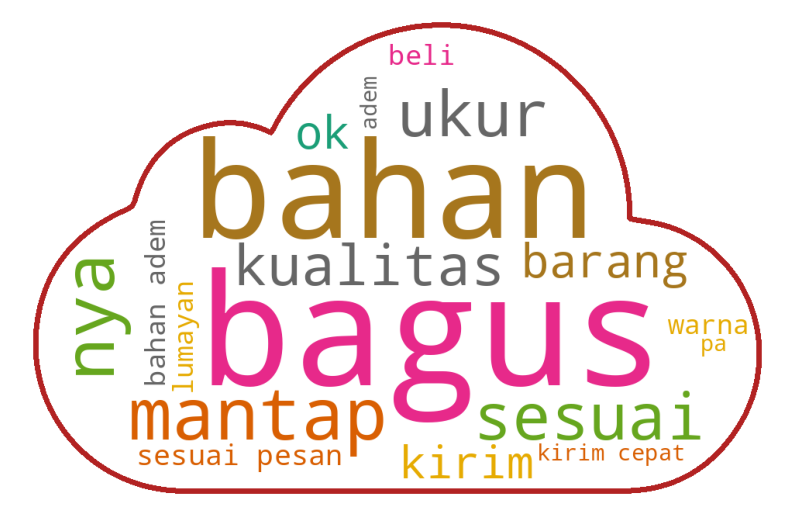

In [30]:
# WordCloud Label negatif data pakaian
import matplotlib.pyplot as plt
pakaian_positif = data_pakaian[data_pakaian["label"] == "positif"]
positif_string = []

for t in pakaian_positif ["komentar_bersih"]:
  positif_string.append(t)

positif_string= pd.Series(positif_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(positif_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('label_pakaian_positif.png')
plt.savefig('label_pakaian_positif.pdf')
plt.show()

## Data elektronik

### Negatif

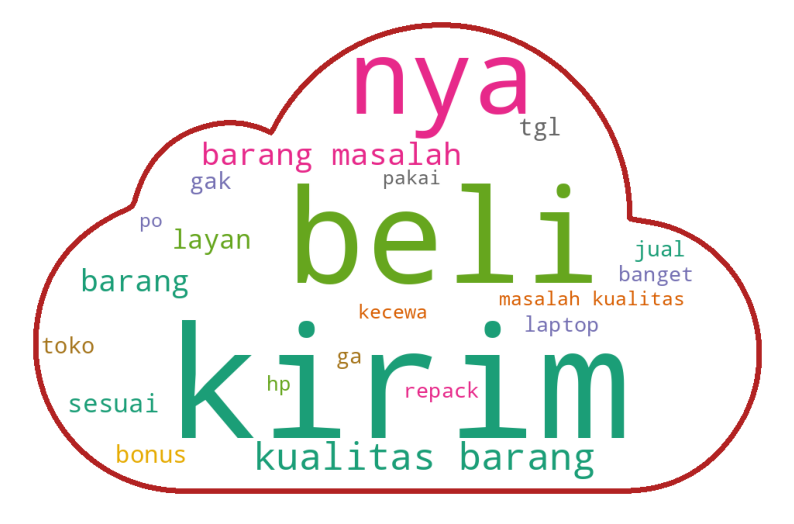

In [31]:
# WordCloud Label negatif data pakaian
import matplotlib.pyplot as plt
elektronik_negatif = data_elektronik[data_elektronik["label"] == "negatif"]
negatif_string = []

for t in elektronik_negatif["komentar_bersih"]:
  negatif_string.append(t)

negatif_string= pd.Series(negatif_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(negatif_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('label_elektronik_negatif.png')
plt.savefig('label_elektronik_negatif.pdf')
plt.show()

### Netral

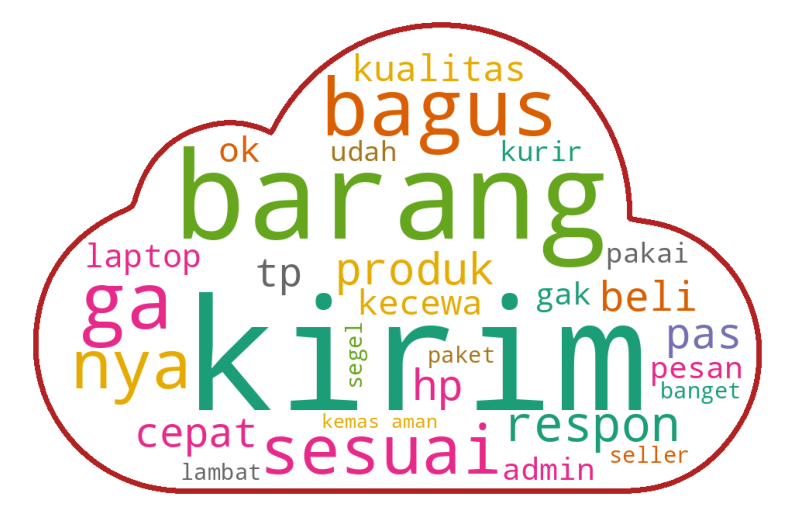

In [32]:
# WordCloud Label negatif data pakaian
import matplotlib.pyplot as plt
elektronik_netral = data_elektronik[data_elektronik["label"] == "netral"]
netral_string = []

for t in elektronik_netral["komentar_bersih"]:
  netral_string.append(t)

netral_string= pd.Series(netral_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(netral_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('label_elektronik_netral.png')
plt.savefig('label_elektronik_netral.pdf')
plt.show()

### Positif

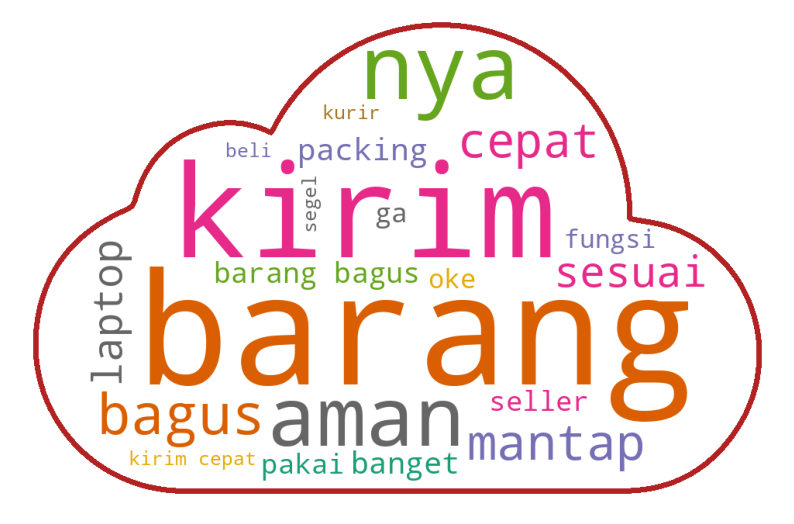

In [33]:
# WordCloud Label negatif data pakaian
import matplotlib.pyplot as plt
elektronik_positif = data_elektronik[data_elektronik["label"] == "positif"]
positif_string = []

for t in elektronik_positif["komentar_bersih"]:
  positif_string.append(t)

positif_string= pd.Series(positif_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(positif_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('label_elektronik_positif.png')
plt.savefig('label_elektronik_positif.pdf')
plt.show()

# Pembobotan kata

## Data pakaian

In [34]:
x_pakaian=data_pakaian["komentar_bersih"]

y_pakaian=data_pakaian["label"]

In [35]:
x_pakaian

0                                              mantapsss
1                                                  keren
2                               barang ok seeuai peeanan
3                                                     ok
4                                            model keren
                             ...                        
640    ga sesuai deskripsi bagi lengan sempit banget ...
641                  ukur trlalu beda ukur gabisa return
642                                    layan jual barang
643                                    layan jual barang
644                                    layan jual barang
Name: komentar_bersih, Length: 1575, dtype: object

In [36]:
y_pakaian

0      positif
1      positif
2      positif
3      positif
4      positif
        ...   
640    negatif
641    negatif
642    negatif
643    negatif
644    negatif
Name: label, Length: 1575, dtype: object

In [373]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_pakaian = TfidfVectorizer(ngram_range=(1,1))
tf_idf_pakaian.fit(x_pakaian)

X_tf_idf_pakaian = tf_idf_pakaian.transform(x_pakaian)

In [375]:
import pickle
pickle.dump(tf_idf_pakaian.vocabulary_,open("feature_tf-idf-pakaian.pkl","wb"))

In [38]:
x_pakaian_tfidf=X_tf_idf_pakaian.toarray()

In [39]:
x_pakaian_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Data elektronik

In [40]:
x_elektronik=data_elektronik["komentar_bersih"]

y_elektronik=data_elektronik["label"]

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_elektronik = TfidfVectorizer(ngram_range=(1,1))
tf_idf_elektronik.fit(x_elektronik)

X_tf_idf_elektronik = tf_idf_pakaian.transform(x_elektronik)

In [376]:
import pickle
pickle.dump(tf_idf_elektronik.vocabulary_,open("feature_tf-idf-elektronik.pkl","wb"))

In [42]:
x_elektronik_tfidf=X_tf_idf_elektronik.toarray()

# data pakaian

In [43]:
from sklearn.model_selection import train_test_split

## 10 persen data test

In [44]:
X_train_pakaian_10persen, X_test_pakaian_10persen, y_train_pakaian_10persen, y_test_pakaian_10persen = train_test_split(x_pakaian_tfidf, y_pakaian, test_size=0.1, random_state=42)

## 20 persen data test

In [45]:
X_train_pakaian_20persen, X_test_pakaian_20persen, y_train_pakaian_20persen, y_test_pakaian_20persen = train_test_split(x_pakaian_tfidf, y_pakaian, test_size=0.2, random_state=42)

## 30 persen data test

In [46]:
X_train_pakaian_30persen, X_test_pakaian_30persen, y_train_pakaian_30persen, y_test_pakaian_30persen = train_test_split(x_pakaian_tfidf, y_pakaian, test_size=0.3, random_state=42)

## 40 persen data test

In [47]:
X_train_pakaian_40persen, X_test_pakaian_40persen, y_train_pakaian_40persen, y_test_pakaian_40persen = train_test_split(x_pakaian_tfidf, y_pakaian, test_size=0.4, random_state=42)

# data elektronik

## 10 persen data test

In [48]:
X_train_elektronik_10persen, X_test_elektronik_10persen, y_train_elektronik_10persen, y_test_elektronik_10persen = train_test_split(x_elektronik_tfidf, y_elektronik, test_size=0.1, random_state=42)

## 20 persen data test

In [49]:
X_train_elektronik_20persen, X_test_elektronik_20persen, y_train_elektronik_20persen, y_test_elektronik_20persen = train_test_split(x_elektronik_tfidf, y_elektronik, test_size=0.2, random_state=42)

## 30 persen data test

In [50]:
X_train_elektronik_30persen, X_test_elektronik_30persen, y_train_elektronik_30persen, y_test_elektronik_30persen = train_test_split(x_elektronik_tfidf, y_elektronik, test_size=0.3, random_state=42)

## 40 persen data test

In [51]:
X_train_elektronik_40persen, X_test_elektronik_40persen, y_train_elektronik_40persen, y_test_elektronik_40persen = train_test_split(x_elektronik_tfidf, y_elektronik, test_size=0.4, random_state=42)

# Pemodelan

##Naives bayes

## 10% data test , 70% data train

### Data elektronik

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [54]:
print(f"data train X: {len(X_train_elektronik_10persen)}")
print(f"data train y: {len(y_train_elektronik_10persen)}")

print(f"data test X: {len(X_test_elektronik_10persen)}")
print(f"data test y: {len(y_test_elektronik_10persen)}")

data train X: 805
data train y: 805
data test X: 90
data test y: 90


In [55]:
from sklearn.naive_bayes import GaussianNB
model_elektronik=GaussianNB()
model_elektronik_nb_10persen = model_elektronik.fit(X_train_elektronik_10persen, y_train_elektronik_10persen)

In [57]:
pred_NB_elektronik_10persen=model_elektronik_nb_10persen.predict(X_test_elektronik_10persen)

In [58]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (pred_NB_elektronik_10persen == y_test_elektronik_10persen).sum()
NewprediksiSalah = (pred_NB_elektronik_10persen!= y_test_elektronik_10persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_NB_elektronik_10persen = confusion_matrix(y_test_elektronik_10persen,pred_NB_elektronik_10persen)

# TN = CM_NB_elektronik [0][0]
# FN = CM_NB_elektronik [1][0]
# TP = CM_NB_elektronik [1][1]
# FP = CM_NB_elektronik [0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy=(TP+FN)/(TP+TN+FP+FN)
# # accuracy_atas=TP+FN
# # accuracy_bawah=TP+TN+FP+FN
# # accuracy=accuracy_atas/accuracy_bawah
# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
print ("Accuraccy:",accuracy_score(y_test_elektronik_10persen,pred_NB_elektronik_10persen)*100,"%")
print(classification_report(y_test_elektronik_10persen,pred_NB_elektronik_10persen))

prediksi benar:  37  data
prediksi salah:  53  data
Akurasi Algoritme:  41.11111111111111 %
Accuraccy: 41.11111111111111 %
              precision    recall  f1-score   support

     negatif       0.38      0.32      0.35        25
      netral       0.24      0.56      0.33        18
     positif       0.70      0.40      0.51        47

    accuracy                           0.41        90
   macro avg       0.44      0.43      0.40        90
weighted avg       0.52      0.41      0.43        90



In [59]:
CM_NB_elektronik_10persen

array([[ 8, 13,  4],
       [ 4, 10,  4],
       [ 9, 19, 19]])

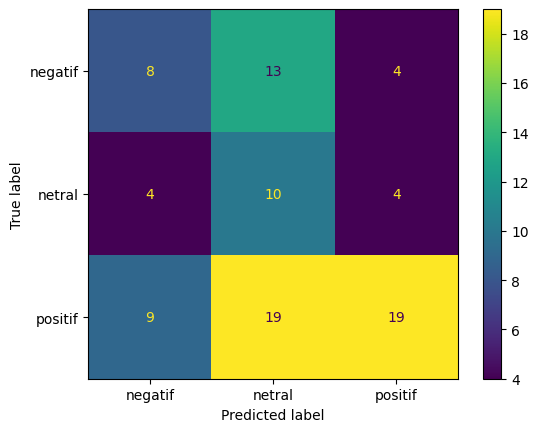

In [60]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=CM_NB_elektronik_10persen ,
                              display_labels=model_elektronik_nb_10persen.classes_)
disp.plot()

plt.show()

### Data pakaian

In [61]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [63]:
print(f"data train X: {len(X_train_pakaian_10persen)}")
print(f"data train y: {len(y_train_pakaian_10persen)}")

print("\ndata testing")
print(f"data test X: {len(X_test_pakaian_10persen)}")
print(f"data test y: {len(y_test_pakaian_10persen)}")

data train X: 1417
data train y: 1417

data testing
data test X: 158
data test y: 158


In [413]:
from sklearn.naive_bayes import GaussianNB
model_pakaian=GaussianNB()
model_pakaian_nb_10persen = model_pakaian.fit(X_train_pakaian_10persen, y_train_pakaian_10persen)

In [414]:
#Prediksi
predicted_pakaian_naives_bayes_10persen = model_pakaian_nb_10persen.predict(X_test_pakaian_10persen)

#Hasil ini akan kita bandingkan dengan nilai y_test (labeling dari manusia)
predicted_pakaian_naives_bayes_10persen[:5]

array(['positif', 'positif', 'positif', 'negatif', 'netral'], dtype='<U7')

In [71]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predicted_pakaian_naives_bayes_10persen == y_test_pakaian_10persen).sum()
NewprediksiSalah = (predicted_pakaian_naives_bayes_10persen!= y_test_pakaian_10persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_NB_pakaian_10persen = confusion_matrix(y_test_pakaian_10persen,predicted_pakaian_naives_bayes_10persen)

# TN = CM_NB_pakaian[0][0]
# FN = CM_NB_pakaian[1][0]
# TP = CM_NB_pakaian[1][1]
# FP = CM_NB_pakaian[0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy_atas=TP+FN
# accuracy_bawah=TP+TN+FP+FN
# accuracy=accuracy_atas/accuracy_bawah
# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
# print ("RECALL:",recall)
# print ("Accuraccy:",accuracy*100,"%")

# print ("\nAccuraccy:",accuracy_score(y_test_pakaian,predicted_pakaian_naives_bayes)*100,"%")
print ("Accuraccy:",accuracy_score(y_test_pakaian_10persen,predicted_pakaian_naives_bayes_10persen))
print(classification_report(y_test_pakaian_10persen,predicted_pakaian_naives_bayes_10persen))

prediksi benar:  50  data
prediksi salah:  108  data
Akurasi Algoritme:  31.645569620253166 %
Accuraccy: 0.31645569620253167
              precision    recall  f1-score   support

     negatif       0.45      0.41      0.43        32
      netral       0.20      0.59      0.29        34
     positif       0.63      0.18      0.29        92

    accuracy                           0.32       158
   macro avg       0.42      0.39      0.34       158
weighted avg       0.50      0.32      0.32       158



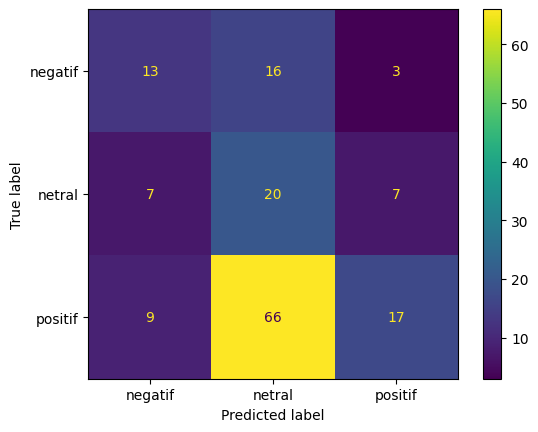

In [415]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix= CM_NB_pakaian_10persen ,
                              display_labels=model_pakaian_nb_10persen .classes_)
disp.plot()

plt.show()

## 20% data test , 70% data train

### Data elektronik

In [73]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB

In [74]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [76]:
print(f"data train X: {len(X_train_elektronik_20persen)}")
print(f"data train y: {len(y_train_elektronik_20persen)}")

print(f"data test X: {len(X_test_elektronik_20persen)}")
print(f"data test y: {len(y_test_elektronik_20persen)}")

data train X: 716
data train y: 716
data test X: 179
data test y: 179


In [379]:
from sklearn.naive_bayes import GaussianNB
model_elektronik=GaussianNB()
model_elektronik_nb_20persen = model_elektronik.fit(X_train_elektronik_20persen, y_train_elektronik_20persen)

In [380]:
pred_NB_elektronik_20persen=model_elektronik_nb_20persen.predict(X_test_elektronik_20persen)

In [381]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (pred_NB_elektronik_20persen == y_test_elektronik_20persen).sum()
NewprediksiSalah = (pred_NB_elektronik_20persen!= y_test_elektronik_20persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_NB_elektronik_20persen = confusion_matrix(y_test_elektronik_20persen,pred_NB_elektronik_20persen)

# TN = CM_NB_elektronik [0][0]
# FN = CM_NB_elektronik [1][0]
# TP = CM_NB_elektronik [1][1]
# FP = CM_NB_elektronik [0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy=(TP+FN)/(TP+TN+FP+FN)
# accuracy_atas=TP+FN
# accuracy_bawah=TP+TN+FP+FN
# accuracy=accuracy_atas/accuracy_bawah
# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
print ("Accuraccy:",accuracy_score(y_test_elektronik_20persen,pred_NB_elektronik_20persen)*100,"%")
print(classification_report(y_test_elektronik_20persen,pred_NB_elektronik_20persen))

prediksi benar:  73  data
prediksi salah:  106  data
Akurasi Algoritme:  40.78212290502793 %
Accuraccy: 40.78212290502793 %
              precision    recall  f1-score   support

     negatif       0.39      0.29      0.33        49
      netral       0.24      0.58      0.34        36
     positif       0.70      0.40      0.51        94

    accuracy                           0.41       179
   macro avg       0.44      0.42      0.39       179
weighted avg       0.52      0.41      0.43       179



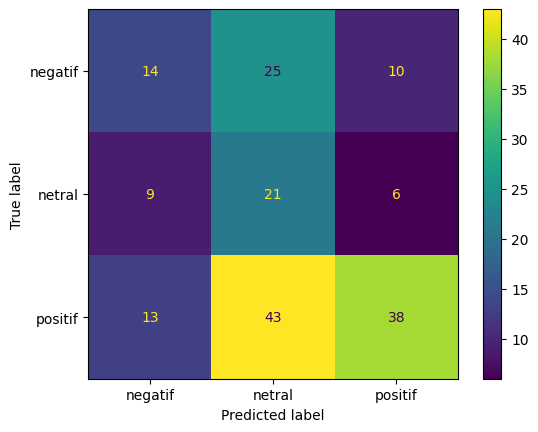

In [390]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=CM_NB_elektronik_20persen ,
                              display_labels=model_elektronik_nb_20persen.classes_)
disp.plot()

plt.show()

### Data pakaian

In [84]:
from sklearn.metrics import classification_report

In [83]:
print(f"data train X: {len(X_train_pakaian_20persen)}")
print(f"data train y: {len(y_train_pakaian_20persen)}")

print("\ndata testing")
print(f"data test X: {len(X_test_pakaian_20persen)}")
print(f"data test y: {len(y_test_pakaian_20persen)}")

data train X: 1260
data train y: 1260

data testing
data test X: 315
data test y: 315


In [385]:
from sklearn.naive_bayes import GaussianNB
model_pakaian=GaussianNB()
model_pakaian_nb_20persen = model_pakaian.fit(X_train_pakaian_20persen, y_train_pakaian_20persen)

In [386]:
#Prediksi
predicted_pakaian_naives_bayes_20persen = model_pakaian_nb_20persen.predict(X_test_pakaian_20persen)

#Hasil ini akan kita bandingkan dengan nilai y_test (labeling dari manusia)
predicted_pakaian_naives_bayes_20persen[:5]

array(['positif', 'netral', 'positif', 'negatif', 'netral'], dtype='<U7')

In [387]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predicted_pakaian_naives_bayes_20persen == y_test_pakaian_20persen).sum()
NewprediksiSalah = (predicted_pakaian_naives_bayes_20persen!= y_test_pakaian_20persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_NB_pakaian_20persen = confusion_matrix(y_test_pakaian_20persen,predicted_pakaian_naives_bayes_20persen)

# TN = CM_NB_pakaian[0][0]
# FN = CM_NB_pakaian[1][0]
# TP = CM_NB_pakaian[1][1]
# FP = CM_NB_pakaian[0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy_atas=TP+FN
# accuracy_bawah=TP+TN+FP+FN
# accuracy=accuracy_atas/accuracy_bawah
# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
# print ("RECALL:",recall)
# print ("Accuraccy:",accuracy*100,"%")

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_20persen,predicted_pakaian_naives_bayes_20persen)*100,"%")
print ("Accuraccy:",accuracy_score(y_test_pakaian_20persen,predicted_pakaian_naives_bayes_20persen))
print(classification_report(y_test_pakaian_20persen,predicted_pakaian_naives_bayes_20persen))

prediksi benar:  114  data
prediksi salah:  201  data
Akurasi Algoritme:  36.19047619047619 %

Accuraccy: 36.19047619047619 %
Accuraccy: 0.3619047619047619
              precision    recall  f1-score   support

     negatif       0.50      0.45      0.47        67
      netral       0.22      0.63      0.32        67
     positif       0.69      0.23      0.35       181

    accuracy                           0.36       315
   macro avg       0.47      0.44      0.38       315
weighted avg       0.55      0.36      0.37       315



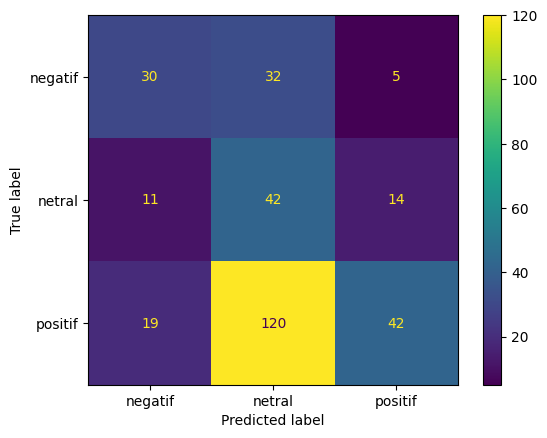

In [389]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=CM_NB_pakaian_20persen ,
                              display_labels=model_pakaian_nb_20persen.classes_)
disp.plot()

plt.show()

## 30% data test , 70% data train

### Data elektronik

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
from sklearn.metrics import classification_report

In [91]:
print(f"data train X: {len(X_train_elektronik_30persen)}")
print(f"data train y: {len(y_train_elektronik_30persen)}")

print(f"data test X: {len(X_test_elektronik_30persen)}")
print(f"data test y: {len(y_test_elektronik_30persen)}")

data train X: 626
data train y: 626
data test X: 269
data test y: 269


In [391]:
from sklearn.naive_bayes import GaussianNB
model_elektronik=GaussianNB()
model_elektronik_nb_30persen = model_elektronik.fit(X_train_elektronik_30persen, y_train_elektronik_30persen)

In [392]:
pred_NB_elektronik_30persen=model_elektronik_nb_30persen.predict(X_test_elektronik_30persen)

In [94]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (pred_NB_elektronik_30persen == y_test_elektronik_30persen).sum()
NewprediksiSalah = (pred_NB_elektronik_30persen!= y_test_elektronik_30persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_NB_elektronik_30persen = confusion_matrix(y_test_elektronik_30persen,pred_NB_elektronik_30persen)

# TN = CM_NB_elektronik [0][0]
# FN = CM_NB_elektronik [1][0]
# TP = CM_NB_elektronik [1][1]
# FP = CM_NB_elektronik [0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy=(TP+FN)/(TP+TN+FP+FN)
# # accuracy_atas=TP+FN
# # accuracy_bawah=TP+TN+FP+FN
# # accuracy=accuracy_atas/accuracy_bawah
# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
print ("Accuraccy:",accuracy_score(y_test_elektronik_30persen,pred_NB_elektronik_30persen)*100,"%")
print(classification_report(y_test_elektronik_30persen,pred_NB_elektronik_30persen))

prediksi benar:  111  data
prediksi salah:  158  data
Akurasi Algoritme:  41.2639405204461 %
Accuraccy: 41.2639405204461 %
              precision    recall  f1-score   support

     negatif       0.48      0.30      0.37        81
      netral       0.21      0.56      0.31        52
     positif       0.70      0.43      0.53       136

    accuracy                           0.41       269
   macro avg       0.46      0.43      0.40       269
weighted avg       0.54      0.41      0.44       269



* precision    = TP/(TP+FP)
* recall       = TP/(TP+FN)
* accuracy=(TP+FN)/(TP+TN+FP+FN)

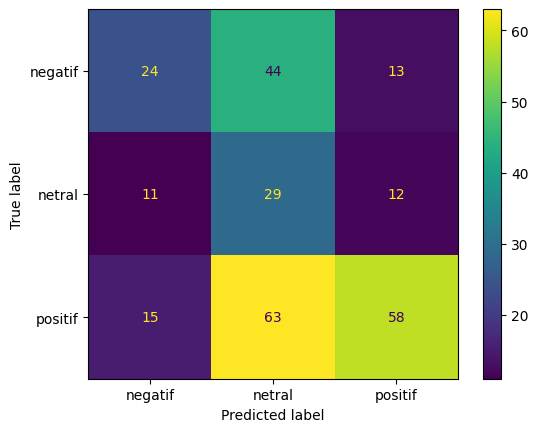

In [393]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=CM_NB_elektronik_30persen ,
                              display_labels=model_elektronik_nb_30persen.classes_)
disp.plot()

plt.show()

### Data pakaian

In [ ]:
from sklearn.metrics import classification_report

In [96]:
print(f"data train X: {len(X_train_pakaian_30persen)}")
print(f"data train y: {len(y_train_pakaian_30persen)}")

print("\ndata testing")
print(f"data test X: {len(X_test_pakaian_30persen)}")
print(f"data test y: {len(y_test_pakaian_30persen)}")

data train X: 1102
data train y: 1102

data testing
data test X: 473
data test y: 473


In [394]:
from sklearn.naive_bayes import GaussianNB
model_pakaian=GaussianNB()
model_pakaian_nb_30persen = model_pakaian.fit(X_train_pakaian_30persen, y_train_pakaian_30persen)

In [395]:
#Prediksi
predicted_pakaian_naives_bayes_30persen = model_pakaian_nb_30persen.predict(X_test_pakaian_30persen)

#Hasil ini akan kita bandingkan dengan nilai y_test (labeling dari manusia)
predicted_pakaian_naives_bayes_30persen[:5]

array(['positif', 'netral', 'positif', 'negatif', 'netral'], dtype='<U7')

In [397]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predicted_pakaian_naives_bayes_30persen == y_test_pakaian_30persen).sum()
NewprediksiSalah = (predicted_pakaian_naives_bayes_30persen!= y_test_pakaian_30persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_NB_pakaian_30persen = confusion_matrix(y_test_pakaian_30persen,predicted_pakaian_naives_bayes_30persen)

TN = CM_NB_pakaian[0][0]
FN = CM_NB_pakaian[1][0]
TP = CM_NB_pakaian[1][1]
FP = CM_NB_pakaian[0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy_atas=TP+FN
# accuracy_bawah=TP+TN+FP+FN
# accuracy=accuracy_atas/accuracy_bawah
# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
# print ("RECALL:",recall)
# print ("Accuraccy:",accuracy*100,"%")

print ("Accuraccy:",accuracy_score(y_test_pakaian_30persen,predicted_pakaian_naives_bayes_30persen))
print(classification_report(y_test_pakaian_30persen,predicted_pakaian_naives_bayes_30persen))

prediksi benar:  173  data
prediksi salah:  300  data
Akurasi Algoritme:  36.57505285412262 %
Accuraccy: 0.3657505285412262
              precision    recall  f1-score   support

     negatif       0.47      0.36      0.40       104
      netral       0.23      0.66      0.35       105
     positif       0.68      0.25      0.37       264

    accuracy                           0.37       473
   macro avg       0.46      0.42      0.37       473
weighted avg       0.53      0.37      0.37       473



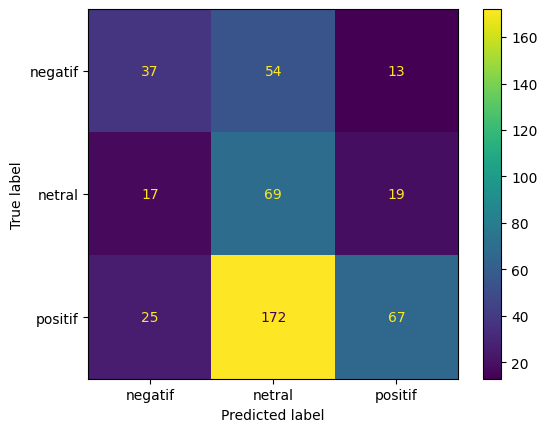

In [398]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=CM_NB_pakaian_30persen ,
                              display_labels=model_pakaian_nb_30persen.classes_)
disp.plot()

plt.show()

## 40% data test , 70% data train

### Data elektronik

In [103]:
from sklearn.naive_bayes import GaussianNB

In [104]:
from sklearn.metrics import classification_report

In [105]:
print(f"data train X: {len(X_train_elektronik_40persen)}")
print(f"data train y: {len(y_train_elektronik_40persen)}")

print(f"data test X: {len(X_test_elektronik_40persen)}")
print(f"data test y: {len(y_test_elektronik_40persen)}")

data train X: 537
data train y: 537
data test X: 358
data test y: 358


In [399]:
from sklearn.naive_bayes import GaussianNB
model_elektronik=GaussianNB()
model_elektronik_nb_40persen = model_elektronik.fit(X_train_elektronik_40persen, y_train_elektronik_40persen)

In [400]:
pred_NB_elektronik_40persen=model_elektronik_nb_40persen.predict(X_test_elektronik_40persen)

In [108]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (pred_NB_elektronik_40persen == y_test_elektronik_40persen).sum()
NewprediksiSalah = (pred_NB_elektronik_40persen!= y_test_elektronik_40persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_NB_elektronik_40persen = confusion_matrix(y_test_elektronik_40persen,pred_NB_elektronik_40persen)

# TN = CM_NB_elektronik [0][0]
# FN = CM_NB_elektronik [1][0]
# TP = CM_NB_elektronik [1][1]
# FP = CM_NB_elektronik [0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy=(TP+FN)/(TP+TN+FP+FN)
# accuracy_atas=TP+FN
# accuracy_bawah=TP+TN+FP+FN
# accuracy=accuracy_atas/accuracy_bawah
# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
print ("Accuraccy:",accuracy_score(y_test_elektronik_40persen,pred_NB_elektronik_40persen)*100,"%")
print(classification_report(y_test_elektronik_40persen,pred_NB_elektronik_40persen))

prediksi benar:  145  data
prediksi salah:  213  data
Akurasi Algoritme:  40.502793296089386 %
Accuraccy: 40.502793296089386 %
              precision    recall  f1-score   support

     negatif       0.42      0.28      0.34       101
      netral       0.21      0.57      0.30        65
     positif       0.70      0.42      0.52       192

    accuracy                           0.41       358
   macro avg       0.44      0.42      0.39       358
weighted avg       0.53      0.41      0.43       358



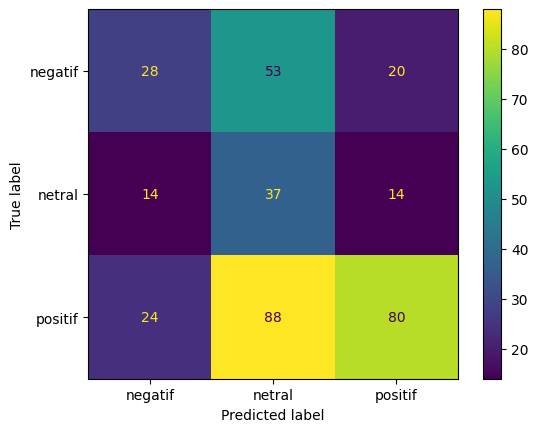

In [401]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=CM_NB_elektronik_40persen ,
                              display_labels=model_elektronik_nb_40persen.classes_)
disp.plot()

plt.show()

### Data pakaian

In [110]:
from sklearn.metrics import classification_report

In [112]:
print(f"data train X: {len(X_train_pakaian_40persen)}")
print(f"data train y: {len(y_train_pakaian_40persen)}")

print("\ndata testing")
print(f"data test X: {len(X_test_pakaian_40persen)}")
print(f"data test y: {len(y_test_pakaian_40persen)}")

data train X: 945
data train y: 945

data testing
data test X: 630
data test y: 630


In [402]:
from sklearn.naive_bayes import GaussianNB
model_pakaian=GaussianNB()
model_pakaian_nb_40persen = model_pakaian.fit(X_train_pakaian_40persen, y_train_pakaian_40persen)

In [403]:
#Prediksi
predicted_pakaian_naives_bayes_40persen = model_pakaian_nb_40persen .predict(X_test_pakaian_40persen)

#Hasil ini akan kita bandingkan dengan nilai y_test (labeling dari manusia)
predicted_pakaian_naives_bayes_40persen[:5]

array(['positif', 'netral', 'positif', 'negatif', 'netral'], dtype='<U7')

In [117]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predicted_pakaian_naives_bayes_40persen == y_test_pakaian_40persen).sum()
NewprediksiSalah = (predicted_pakaian_naives_bayes_40persen!= y_test_pakaian_40persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_NB_pakaian_40persen = confusion_matrix(y_test_pakaian_40persen,predicted_pakaian_naives_bayes_40persen)

TN = CM_NB_pakaian[0][0]
FN = CM_NB_pakaian[1][0]
TP = CM_NB_pakaian[1][1]
FP = CM_NB_pakaian[0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy_atas=TP+FN
# accuracy_bawah=TP+TN+FP+FN
# accuracy=accuracy_atas/accuracy_bawah
# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
# print ("RECALL:",recall)
# print ("Accuraccy:",accuracy*100,"%")

print ("Accuraccy:",accuracy_score(y_test_pakaian_40persen,predicted_pakaian_naives_bayes_40persen))
print(classification_report(y_test_pakaian_40persen,predicted_pakaian_naives_bayes_40persen))

prediksi benar:  234  data
prediksi salah:  396  data
Akurasi Algoritme:  37.142857142857146 %
Accuraccy: 0.37142857142857144
              precision    recall  f1-score   support

     negatif       0.46      0.41      0.44       141
      netral       0.23      0.59      0.33       138
     positif       0.67      0.27      0.38       351

    accuracy                           0.37       630
   macro avg       0.45      0.42      0.38       630
weighted avg       0.52      0.37      0.38       630



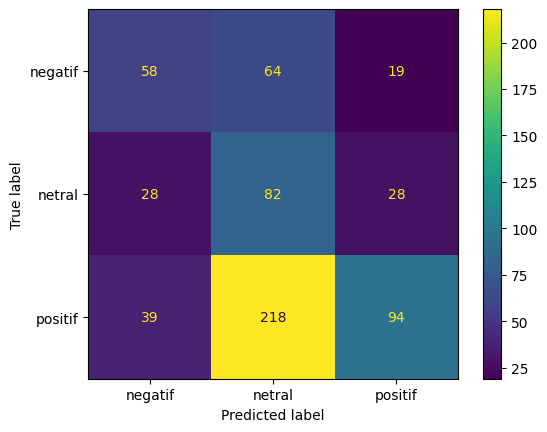

In [404]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=CM_NB_pakaian_40persen ,
                              display_labels=model_pakaian_nb_40persen .classes_)
disp.plot()

plt.show()

# Decision tree

In [122]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier(criterion='gini')

## 10% data test , 70% data train

### data Pakaian

In [421]:
model_dec_pakaian_10persen = dec_tree.fit(X_train_pakaian_10persen, y_train_pakaian_10persen)

In [422]:
pred_dec_tree_pakaian_10persen=model_dec_pakaian_10persen.predict(X_test_pakaian_10persen)

In [423]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (pred_dec_tree_pakaian_10persen== y_test_pakaian_10persen).sum()
NewprediksiSalah = (pred_dec_tree_pakaian_10persen!= y_test_pakaian_10persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Tree_pakaian_10persen = confusion_matrix(y_test_pakaian_10persen,pred_dec_tree_pakaian_10persen)

# TN = CM_Tree_pakaian [0][0]
# FN = CM_Tree_pakaian [1][0]
# TP = CM_Tree_pakaian [1][1]
# FP = CM_Tree_pakaian [0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy=(TP+FN)/(TP+TN+FP+FN)

# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
# print ("RECALL:",recall)
# print ("Accuraccy:",accuracy)
print ("Accuraccy:", accuracy_score(y_test_pakaian_10persen,pred_dec_tree_pakaian_10persen)*100,"%")
print(classification_report(y_test_pakaian_10persen,pred_dec_tree_pakaian_10persen))

prediksi benar:  108  data
prediksi salah:  50  data
Akurasi Algoritme:  68.35443037974683 %
Accuraccy: 68.35443037974683 %
              precision    recall  f1-score   support

     negatif       0.59      0.72      0.65        32
      netral       0.53      0.24      0.33        34
     positif       0.74      0.84      0.79        92

    accuracy                           0.68       158
   macro avg       0.62      0.60      0.59       158
weighted avg       0.67      0.68      0.66       158



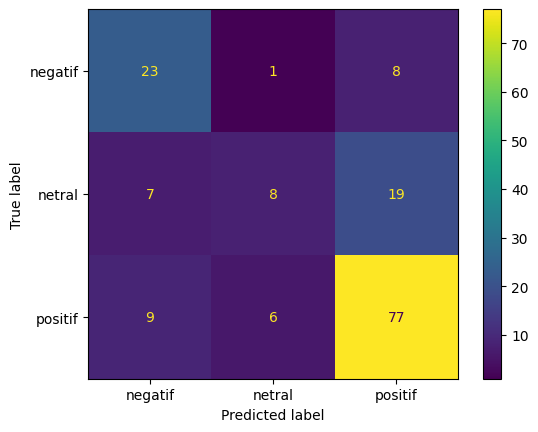

In [424]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=CM_Tree_pakaian_10persen ,
                              display_labels=model_dec_pakaian_10persen.classes_)
disp.plot()

plt.show()

### Data elektronik

In [425]:
model_dec_elektronik_10persen = dec_tree.fit(X_train_elektronik_10persen, y_train_elektronik_10persen)

In [426]:
pred_dec_tree_elektronik_10persen=model_dec_elektronik_10persen.predict(X_test_elektronik_10persen)

In [427]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (pred_dec_tree_elektronik_10persen == y_test_elektronik_10persen).sum()
NewprediksiSalah = (pred_dec_tree_elektronik_10persen!= y_test_elektronik_10persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Tree_elektronik_10persen = confusion_matrix(y_test_elektronik_10persen,pred_dec_tree_elektronik_10persen)

# TN = CM_Tree_elektronik [0][0]
# FN = CM_Tree_elektronik [1][0]
# TP = CM_Tree_elektronik [1][1]
# FP = CM_Tree_elektronik [0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy=(TP+FN)/(TP+TN+FP+FN)

# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
# print ("RECALL:",recall)
print ("\nAccuraccy:",accuracy_score(y_test_elektronik_10persen,pred_dec_tree_elektronik_10persen)*100,"%")
print(classification_report(y_test_elektronik_10persen,pred_dec_tree_elektronik_10persen))

prediksi benar:  55  data
prediksi salah:  35  data
Akurasi Algoritme:  61.111111111111114 %

Accuraccy: 61.111111111111114 %
              precision    recall  f1-score   support

     negatif       0.67      0.48      0.56        25
      netral       0.25      0.17      0.20        18
     positif       0.67      0.85      0.75        47

    accuracy                           0.61        90
   macro avg       0.53      0.50      0.50        90
weighted avg       0.58      0.61      0.59        90



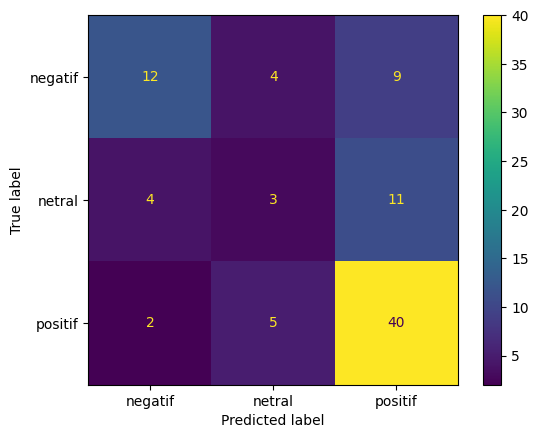

In [428]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=CM_Tree_elektronik_10persen ,
                              display_labels=model_dec_elektronik_10persen .classes_)
disp.plot()

plt.show()

## 20% data test , 80% data train

### data Pakaian

In [132]:
model_dec_pakaian_20persen = dec_tree.fit(X_train_pakaian_20persen, y_train_pakaian_20persen)

In [133]:
pred_dec_tree_pakaian_20persen=model_dec_pakaian_20persen.predict(X_test_pakaian_20persen)

In [134]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (pred_dec_tree_pakaian_20persen== y_test_pakaian_20persen).sum()
NewprediksiSalah = (pred_dec_tree_pakaian_20persen!= y_test_pakaian_20persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Tree_pakaian_20persen = confusion_matrix(y_test_pakaian_20persen,pred_dec_tree_pakaian_20persen)

# TN = CM_Tree_pakaian [0][0]
# FN = CM_Tree_pakaian [1][0]
# TP = CM_Tree_pakaian [1][1]
# FP = CM_Tree_pakaian [0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy=(TP+FN)/(TP+TN+FP+FN)

# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
# print ("RECALL:",recall)
# print ("Accuraccy:",accuracy)
print ("Accuraccy:", accuracy_score(y_test_pakaian_20persen,pred_dec_tree_pakaian_20persen)*100,"%")
print(classification_report(y_test_pakaian_20persen,pred_dec_tree_pakaian_20persen))

prediksi benar:  206  data
prediksi salah:  109  data
Akurasi Algoritme:  65.39682539682539 %
Accuraccy: 65.39682539682539 %
              precision    recall  f1-score   support

     negatif       0.54      0.61      0.57        67
      netral       0.48      0.30      0.37        67
     positif       0.74      0.80      0.77       181

    accuracy                           0.65       315
   macro avg       0.58      0.57      0.57       315
weighted avg       0.64      0.65      0.64       315



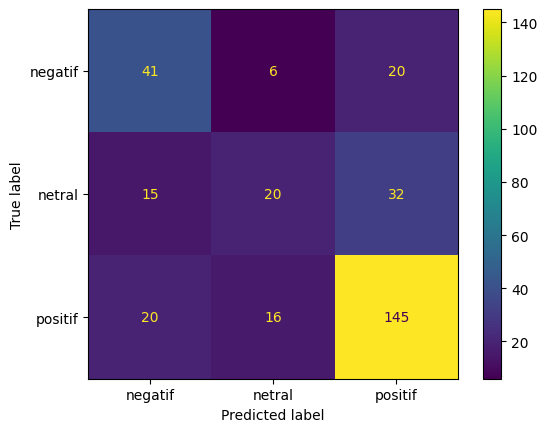

In [135]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=CM_Tree_pakaian_20persen ,
                              display_labels=model_dec_pakaian_20persen.classes_)
disp.plot()

plt.show()

### Data elektronik

In [431]:
model_dec_elektronik_20persen = dec_tree.fit(X_train_elektronik_20persen, y_train_elektronik_20persen)

In [432]:
pred_dec_tree_elektronik_20persen=model_dec_elektronik_20persen.predict(X_test_elektronik_20persen)

In [433]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (pred_dec_tree_elektronik_20persen == y_test_elektronik_20persen).sum()
NewprediksiSalah = (pred_dec_tree_elektronik_20persen!= y_test_elektronik_20persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Tree_elektronik_20persen = confusion_matrix(y_test_elektronik_20persen,pred_dec_tree_elektronik_20persen)

# TN = CM_Tree_elektronik [0][0]
# FN = CM_Tree_elektronik [1][0]
# TP = CM_Tree_elektronik [1][1]
# FP = CM_Tree_elektronik [0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy=(TP+FN)/(TP+TN+FP+FN)

# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
# print ("RECALL:",recall)
print ("\nAccuraccy:",accuracy_score(y_test_elektronik_20persen,pred_dec_tree_elektronik_20persen)*100,"%")
print(classification_report(y_test_elektronik_20persen,pred_dec_tree_elektronik_20persen))

prediksi benar:  112  data
prediksi salah:  67  data
Akurasi Algoritme:  62.56983240223464 %

Accuraccy: 62.56983240223464 %
              precision    recall  f1-score   support

     negatif       0.63      0.55      0.59        49
      netral       0.36      0.25      0.30        36
     positif       0.68      0.81      0.74        94

    accuracy                           0.63       179
   macro avg       0.56      0.54      0.54       179
weighted avg       0.60      0.63      0.61       179



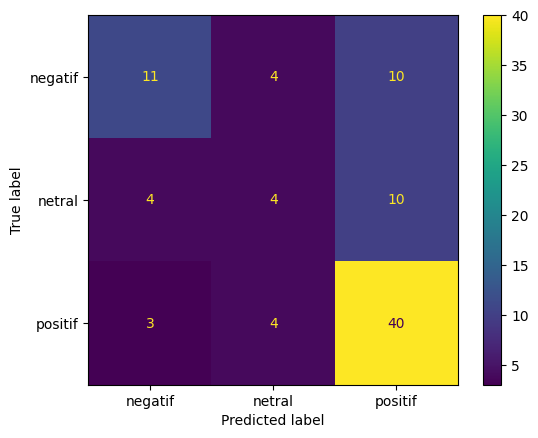

In [ ]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=CM_Tree_elektronik_20persen ,
                              display_labels=model_dec_elektronik_20persen .classes_)
disp.plot()

plt.show()

## 30% data test , 70% data train

### data Pakaian

In [136]:
model_dec_pakaian_30persen = dec_tree.fit(X_train_pakaian_30persen, y_train_pakaian_30persen)

In [137]:
pred_dec_tree_pakaian_30persen=model_dec_pakaian_30persen.predict(X_test_pakaian_30persen)

In [138]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (pred_dec_tree_pakaian_30persen== y_test_pakaian_30persen).sum()
NewprediksiSalah = (pred_dec_tree_pakaian_30persen!= y_test_pakaian_30persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Tree_pakaian_30persen = confusion_matrix(y_test_pakaian_30persen,pred_dec_tree_pakaian_30persen)

# TN = CM_Tree_pakaian [0][0]
# FN = CM_Tree_pakaian [1][0]
# TP = CM_Tree_pakaian [1][1]
# FP = CM_Tree_pakaian [0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy=(TP+FN)/(TP+TN+FP+FN)

# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
# print ("RECALL:",recall)
# print ("Accuraccy:",accuracy)
print ("Accuraccy:", accuracy_score(y_test_pakaian_30persen,pred_dec_tree_pakaian_30persen)*100,"%")
print(classification_report(y_test_pakaian_30persen,pred_dec_tree_pakaian_30persen))

prediksi benar:  301  data
prediksi salah:  172  data
Akurasi Algoritme:  63.63636363636363 %
Accuraccy: 63.63636363636363 %
              precision    recall  f1-score   support

     negatif       0.55      0.57      0.56       104
      netral       0.44      0.25      0.32       105
     positif       0.70      0.82      0.76       264

    accuracy                           0.64       473
   macro avg       0.57      0.54      0.54       473
weighted avg       0.61      0.64      0.62       473



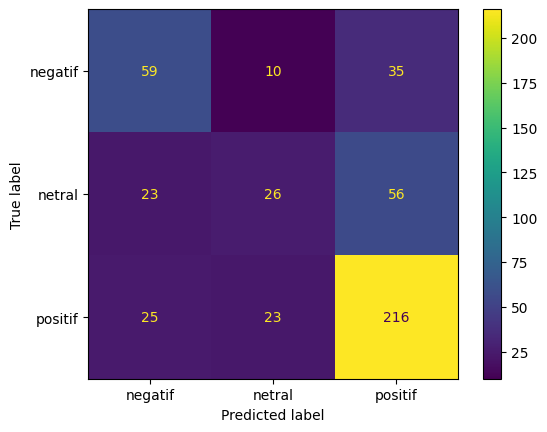

In [139]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=CM_Tree_pakaian_30persen ,
                              display_labels=model_dec_pakaian_30persen.classes_)
disp.plot()

plt.show()

### Data elektronik

In [437]:
model_dec_elektronik_30persen = dec_tree.fit(X_train_elektronik_30persen, y_train_elektronik_30persen)

In [438]:
pred_dec_tree_elektronik_30persen=model_dec_elektronik_30persen.predict(X_test_elektronik_30persen)

In [439]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (pred_dec_tree_elektronik_30persen == y_test_elektronik_30persen).sum()
NewprediksiSalah = (pred_dec_tree_elektronik_30persen!= y_test_elektronik_30persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Tree_elektronik_30persen = confusion_matrix(y_test_elektronik_30persen,pred_dec_tree_elektronik_30persen)

# TN = CM_Tree_elektronik [0][0]
# FN = CM_Tree_elektronik [1][0]
# TP = CM_Tree_elektronik [1][1]
# FP = CM_Tree_elektronik [0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy=(TP+FN)/(TP+TN+FP+FN)

# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
# print ("RECALL:",recall)
print ("\nAccuraccy:",accuracy_score(y_test_elektronik_30persen,pred_dec_tree_elektronik_30persen)*100,"%")
print(classification_report(y_test_elektronik_30persen,pred_dec_tree_elektronik_30persen))

prediksi benar:  161  data
prediksi salah:  108  data
Akurasi Algoritme:  59.85130111524164 %

Accuraccy: 59.85130111524164 %
              precision    recall  f1-score   support

     negatif       0.62      0.54      0.58        81
      netral       0.33      0.25      0.29        52
     positif       0.65      0.76      0.71       136

    accuracy                           0.60       269
   macro avg       0.54      0.52      0.52       269
weighted avg       0.58      0.60      0.59       269



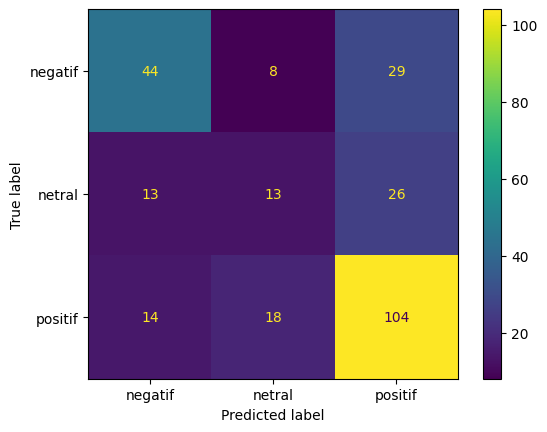

In [440]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=CM_Tree_elektronik_30persen ,
                              display_labels=model_dec_elektronik_30persen .classes_)
disp.plot()

plt.show()

## 40% data test , 60% data train

### data Pakaian

In [145]:
model_dec_pakaian_40persen = dec_tree.fit(X_train_pakaian_40persen, y_train_pakaian_40persen)

In [147]:
pred_dec_tree_pakaian_40persen=model_dec_pakaian_40persen.predict(X_test_pakaian_40persen)

In [148]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (pred_dec_tree_pakaian_40persen== y_test_pakaian_40persen).sum()
NewprediksiSalah = (pred_dec_tree_pakaian_40persen!= y_test_pakaian_40persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Tree_pakaian_40persen = confusion_matrix(y_test_pakaian_40persen,pred_dec_tree_pakaian_40persen)

# TN = CM_Tree_pakaian [0][0]
# FN = CM_Tree_pakaian [1][0]
# TP = CM_Tree_pakaian [1][1]
# FP = CM_Tree_pakaian [0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy=(TP+FN)/(TP+TN+FP+FN)

# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
# print ("RECALL:",recall)
# print ("Accuraccy:",accuracy)
print ("Accuraccy:", accuracy_score(y_test_pakaian_40persen,pred_dec_tree_pakaian_40persen)*100,"%")
print(classification_report(y_test_pakaian_40persen,pred_dec_tree_pakaian_40persen))

prediksi benar:  393  data
prediksi salah:  237  data
Akurasi Algoritme:  62.38095238095238 %
Accuraccy: 62.38095238095238 %
              precision    recall  f1-score   support

     negatif       0.51      0.60      0.55       141
      netral       0.37      0.26      0.31       138
     positif       0.74      0.78      0.76       351

    accuracy                           0.62       630
   macro avg       0.54      0.54      0.54       630
weighted avg       0.61      0.62      0.61       630



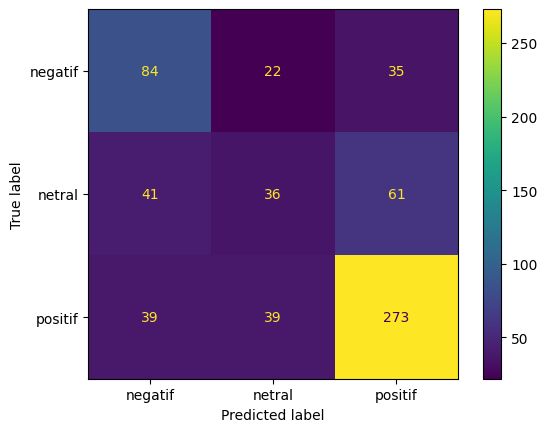

In [149]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=CM_Tree_pakaian_40persen ,
                              display_labels=model_dec_pakaian_40persen.classes_)
disp.plot()

plt.show()

### Data elektronik

In [150]:
model_dec_elektronik_40persen = dec_tree.fit(X_train_elektronik_40persen, y_train_elektronik_40persen)

In [434]:
pred_dec_tree_elektronik_40persen=model_dec_elektronik_40persen .predict(X_test_elektronik_40persen)

In [435]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (pred_dec_tree_elektronik_40persen == y_test_elektronik_40persen).sum()
NewprediksiSalah = (pred_dec_tree_elektronik_40persen!= y_test_elektronik_40persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Tree_elektronik_40persen = confusion_matrix(y_test_elektronik_40persen,pred_dec_tree_elektronik_40persen)

# TN = CM_Tree_elektronik [0][0]
# FN = CM_Tree_elektronik [1][0]
# TP = CM_Tree_elektronik [1][1]
# FP = CM_Tree_elektronik [0][1]

# precision    = TP/(TP+FP)
# recall       = TP/(TP+FN)
# accuracy=(TP+FN)/(TP+TN+FP+FN)

# print ("\nTRUE NEGATIVE (TN):",TN)
# print ("FALSE NEGATIVE (FN):",FN)
# print ("TRUE POSITIVE (TP):",TP)
# print ("FALSE POSITIVE (FP):",FP)
# print ("\nPRECISION:",precision*100,"%")
# print ("RECALL:",recall*100,"%")
# print ("RECALL:",recall)
print ("\nAccuraccy:",accuracy_score(y_test_elektronik_40persen,pred_dec_tree_elektronik_40persen)*100,"%")
print(classification_report(y_test_elektronik_40persen,pred_dec_tree_elektronik_40persen))

prediksi benar:  284  data
prediksi salah:  74  data
Akurasi Algoritme:  79.3296089385475 %

Accuraccy: 79.3296089385475 %
              precision    recall  f1-score   support

     negatif       0.82      0.73      0.77       101
      netral       0.69      0.57      0.62        65
     positif       0.81      0.90      0.85       192

    accuracy                           0.79       358
   macro avg       0.77      0.73      0.75       358
weighted avg       0.79      0.79      0.79       358



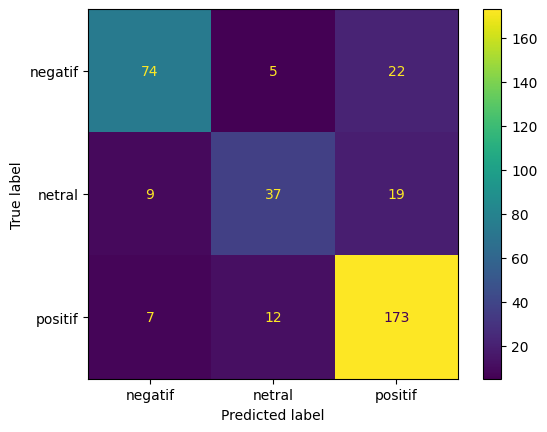

In [436]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=CM_Tree_elektronik_40persen ,
                              display_labels=model_dec_elektronik_40persen .classes_)
disp.plot()

plt.show()

# K nearest neighbor KNN

In [155]:
from sklearn.neighbors import KNeighborsClassifier

## nilai K=5

In [156]:
KNN_K5=KNeighborsClassifier(metric='cosine',n_neighbors=5)

## 10% data test , 90% data train

### Data pakaian

In [157]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=2

print("data train")
print(f"data train X {len(X_train_pakaian_10persen)}")
print(f"data train Y {len(y_train_pakaian_10persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_10persen)}")
print(f"data test Y {len(y_test_pakaian_10persen)}")

data train
data train X 1417
data train Y 1417

data test
data test X 158
data test Y 158


In [158]:
model_knn_pakaian_10persen_data_K5=KNN_K5.fit(X_train_pakaian_10persen, y_train_pakaian_10persen)

In [159]:
predmodel_knn_pakaian_10persen_K5=model_knn_pakaian_10persen_data_K5.predict(X_test_pakaian_10persen)

#### Evaluasi

In [160]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_10persen_K5 == y_test_pakaian_10persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_10persen_K5!= y_test_pakaian_10persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_pakaian_10persendata_k5 = confusion_matrix(y_test_pakaian_10persen,predmodel_knn_pakaian_10persen_K5)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_10persen,predmodel_knn_pakaian_10persen_K5)*100,"%")
print("\n",classification_report(y_test_pakaian_10persen,predmodel_knn_pakaian_10persen_K5))

prediksi benar:  103  data
prediksi salah:  55  data
Akurasi Algoritme:  65.18987341772153 %

Accuraccy: 65.18987341772153 %

               precision    recall  f1-score   support

     negatif       0.56      0.56      0.56        32
      netral       0.48      0.29      0.36        34
     positif       0.71      0.82      0.76        92

    accuracy                           0.65       158
   macro avg       0.58      0.56      0.56       158
weighted avg       0.63      0.65      0.64       158



In [161]:
CM_Knn_pakaian_10persendata_k5

array([[18,  3, 11],
       [ 5, 10, 19],
       [ 9,  8, 75]])

### Data elektronik

In [162]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=1


print("data train")
print(f"data train X {len(X_train_elektronik_10persen)}")
print(f"data train Y {len(y_train_elektronik_10persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_10persen)}")
print(f"data test Y {len(y_test_elektronik_10persen)}")

data train
data train X 805
data train Y 805

data test
data test X 90
data test Y 90


In [163]:
model_knn_elektronik_10persen_data_K5=KNN_K5.fit(X_train_elektronik_10persen, y_train_elektronik_10persen)

In [164]:
predmodel_knn_elektronik_10persen_K5=model_knn_elektronik_10persen_data_K5.predict(X_test_elektronik_10persen)

#### Evaluasi

In [165]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_10persen_K5 == y_test_elektronik_10persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_10persen_K5!= y_test_elektronik_10persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_10persendata_k5 = confusion_matrix(y_test_elektronik_10persen,predmodel_knn_elektronik_10persen_K5)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_10persen,predmodel_knn_elektronik_10persen_K5)*100,"%")
print("\n",classification_report(y_test_elektronik_10persen,predmodel_knn_elektronik_10persen_K5))

prediksi benar:  63  data
prediksi salah:  27  data
Akurasi Algoritme:  70.0 %

Accuraccy: 70.0 %

               precision    recall  f1-score   support

     negatif       0.74      0.68      0.71        25
      netral       0.40      0.22      0.29        18
     positif       0.74      0.89      0.81        47

    accuracy                           0.70        90
   macro avg       0.63      0.60      0.60        90
weighted avg       0.67      0.70      0.68        90



In [166]:
CM_Knn_elektronik_10persendata_k5

array([[17,  5,  3],
       [ 2,  4, 12],
       [ 4,  1, 42]])

## 20% data test , 80% data train

### Data pakaian

In [167]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=2

print("data train")
print(f"data train X {len(X_train_pakaian_20persen)}")
print(f"data train Y {len(y_train_pakaian_20persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_20persen)}")
print(f"data test Y {len(y_test_pakaian_20persen)}")

data train
data train X 1260
data train Y 1260

data test
data test X 315
data test Y 315


In [168]:
model_knn_pakaian_20persen_data_K5=KNN_K5.fit(X_train_pakaian_20persen, y_train_pakaian_20persen)

In [169]:
predmodel_knn_pakaian_20persen_K5=model_knn_pakaian_20persen_data_K5.predict(X_test_pakaian_20persen)

#### Evaluasi

In [170]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_20persen_K5 == y_test_pakaian_20persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_20persen_K5!= y_test_pakaian_20persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_pakaian_20persendata_k5 = confusion_matrix(y_test_pakaian_20persen,predmodel_knn_pakaian_20persen_K5)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_20persen,predmodel_knn_pakaian_20persen_K5)*100,"%")
print("\n",classification_report(y_test_pakaian_20persen,predmodel_knn_pakaian_20persen_K5))

prediksi benar:  196  data
prediksi salah:  119  data
Akurasi Algoritme:  62.22222222222222 %

Accuraccy: 62.22222222222222 %

               precision    recall  f1-score   support

     negatif       0.50      0.54      0.52        67
      netral       0.34      0.25      0.29        67
     positif       0.74      0.79      0.76       181

    accuracy                           0.62       315
   macro avg       0.53      0.53      0.52       315
weighted avg       0.60      0.62      0.61       315



In [171]:
CM_Knn_pakaian_20persendata_k5

array([[ 36,  13,  18],
       [ 18,  17,  32],
       [ 18,  20, 143]])

### Data elektronik

In [172]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=1


print("data train")
print(f"data train X {len(X_train_elektronik_20persen)}")
print(f"data train Y {len(y_train_elektronik_20persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_20persen)}")
print(f"data test Y {len(y_test_elektronik_20persen)}")

data train
data train X 716
data train Y 716

data test
data test X 179
data test Y 179


In [173]:
model_knn_elektronik_20persen_data_K5=KNN_K5.fit(X_train_elektronik_20persen, y_train_elektronik_20persen)

In [174]:
predmodel_knn_elektronik_20persen_K5=model_knn_elektronik_20persen_data_K5.predict(X_test_elektronik_20persen)

#### Evaluasi

In [175]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_20persen_K5 == y_test_elektronik_20persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_20persen_K5!= y_test_elektronik_20persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_20persendata_k5 = confusion_matrix(y_test_elektronik_20persen,predmodel_knn_elektronik_20persen_K5)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_20persen,predmodel_knn_elektronik_20persen_K5)*100,"%")
print("\n",classification_report(y_test_elektronik_20persen,predmodel_knn_elektronik_20persen_K5))

prediksi benar:  115  data
prediksi salah:  64  data
Akurasi Algoritme:  64.24581005586593 %

Accuraccy: 64.24581005586593 %

               precision    recall  f1-score   support

     negatif       0.73      0.61      0.67        49
      netral       0.24      0.17      0.20        36
     positif       0.70      0.84      0.76        94

    accuracy                           0.64       179
   macro avg       0.56      0.54      0.54       179
weighted avg       0.62      0.64      0.62       179



In [176]:
CM_Knn_elektronik_20persendata_k5

array([[30,  9, 10],
       [ 6,  6, 24],
       [ 5, 10, 79]])

## 30% data test , 70% data train

### Data pakaian

In [177]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_pakaian_30persen)}")
print(f"data train Y {len(y_train_pakaian_30persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_30persen)}")
print(f"data test Y {len(y_test_pakaian_30persen)}")

data train
data train X 1102
data train Y 1102

data test
data test X 473
data test Y 473


In [178]:
model_knn_pakaian_30persen_data_K5=KNN_K5.fit(X_train_pakaian_30persen, y_train_pakaian_30persen)

In [179]:
# prediksi
predmodel_knn_pakaian_30persen_K5=model_knn_pakaian_30persen_data_K5.predict(X_test_pakaian_30persen)

#### Evaluasi

In [180]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_30persen_K5== y_test_pakaian_30persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_30persen_K5!= y_test_pakaian_30persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Knn_pakaian_30persendata_k5 = confusion_matrix(y_test_pakaian_30persen,predmodel_knn_pakaian_30persen_K5)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_30persen,predmodel_knn_pakaian_30persen_K5)*100,"%")

print("\n",classification_report(y_test_pakaian_30persen,predmodel_knn_pakaian_30persen_K5))

prediksi benar:  296  data
prediksi salah:  177  data
Akurasi Algoritme:  62.579281183932345 %

Accuraccy: 62.579281183932345 %

               precision    recall  f1-score   support

     negatif       0.49      0.51      0.50       104
      netral       0.39      0.21      0.27       105
     positif       0.72      0.84      0.77       264

    accuracy                           0.63       473
   macro avg       0.53      0.52      0.51       473
weighted avg       0.59      0.63      0.60       473



In [181]:
CM_Knn_pakaian_30persendata_k5

array([[ 53,  20,  31],
       [ 27,  22,  56],
       [ 28,  15, 221]])

### Data elektronik

In [182]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_elektronik_30persen)}")
print(f"data train Y {len(y_train_elektronik_30persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_30persen)}")
print(f"data test Y {len(y_test_elektronik_30persen)}")

data train
data train X 626
data train Y 626

data test
data test X 269
data test Y 269


In [183]:
model_knn_elektronik_30persen_data_K5=KNN_K5.fit(X_train_elektronik_30persen, y_train_elektronik_30persen)

In [184]:
predmodel_knn_elektronik_30persen_K5=model_knn_elektronik_30persen_data_K5.predict(X_test_elektronik_30persen)

#### Evaluasi

In [185]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_30persen_K5 == y_test_elektronik_30persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_30persen_K5!= y_test_elektronik_30persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_30persendata_k5 = confusion_matrix(y_test_elektronik_30persen,predmodel_knn_elektronik_30persen_K5)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_30persen,predmodel_knn_elektronik_30persen_K5)*100,"%")
print("\n",classification_report(y_test_elektronik_30persen,predmodel_knn_elektronik_30persen_K5))

prediksi benar:  163  data
prediksi salah:  106  data
Akurasi Algoritme:  60.594795539033456 %

Accuraccy: 60.594795539033456 %

               precision    recall  f1-score   support

     negatif       0.69      0.53      0.60        81
      netral       0.21      0.17      0.19        52
     positif       0.68      0.82      0.74       136

    accuracy                           0.61       269
   macro avg       0.53      0.51      0.51       269
weighted avg       0.59      0.61      0.59       269



In [186]:
CM_Knn_elektronik_30persendata_k5

array([[ 43,  18,  20],
       [ 10,   9,  33],
       [  9,  16, 111]])

## 40% data test , 60% data train

### Data pakaian

In [187]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_pakaian_40persen)}")
print(f"data train Y {len(y_train_pakaian_40persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_40persen)}")
print(f"data test Y {len(y_test_pakaian_40persen)}")

data train
data train X 945
data train Y 945

data test
data test X 630
data test Y 630


In [188]:
model_knn_pakaian_40persen_data_K5=KNN_K5.fit(X_train_pakaian_40persen, y_train_pakaian_40persen)

In [189]:
# prediksi
predmodel_knn_pakaian_40persen_K5=model_knn_pakaian_40persen_data_K5.predict(X_test_pakaian_40persen)

#### Evaluasi

In [190]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_40persen_K5== y_test_pakaian_40persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_40persen_K5!= y_test_pakaian_40persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Knn_pakaian_40persendata_k5 = confusion_matrix(y_test_pakaian_40persen,predmodel_knn_pakaian_40persen_K5)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_40persen,predmodel_knn_pakaian_40persen_K5)*100,"%")

print("\n",classification_report(y_test_pakaian_40persen,predmodel_knn_pakaian_40persen_K5))

prediksi benar:  398  data
prediksi salah:  232  data
Akurasi Algoritme:  63.17460317460317 %

Accuraccy: 63.17460317460317 %

               precision    recall  f1-score   support

     negatif       0.50      0.56      0.53       141
      netral       0.38      0.25      0.30       138
     positif       0.74      0.81      0.78       351

    accuracy                           0.63       630
   macro avg       0.54      0.54      0.54       630
weighted avg       0.61      0.63      0.62       630



In [191]:
CM_Knn_pakaian_40persendata_k5

array([[ 79,  28,  34],
       [ 39,  34,  65],
       [ 39,  27, 285]])

### Data elektronik

In [192]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_elektronik_40persen)}")
print(f"data train Y {len(y_train_elektronik_40persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_40persen)}")
print(f"data test Y {len(y_test_elektronik_40persen)}")

data train
data train X 537
data train Y 537

data test
data test X 358
data test Y 358


In [193]:
model_knn_elektronik_40persen_data_K5=KNN_K5.fit(X_train_elektronik_40persen, y_train_elektronik_40persen)

In [194]:
predmodel_knn_elektronik_40persen_K5=model_knn_elektronik_40persen_data_K5.predict(X_test_elektronik_40persen)

#### Evaluasi

In [195]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_40persen_K5 == y_test_elektronik_40persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_40persen_K5!= y_test_elektronik_40persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_40persendata_k5 = confusion_matrix(y_test_elektronik_40persen,predmodel_knn_elektronik_40persen_K5)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_40persen,predmodel_knn_elektronik_40persen_K5)*100,"%")
print("\n",classification_report(y_test_elektronik_40persen,predmodel_knn_elektronik_40persen_K5))

prediksi benar:  219  data
prediksi salah:  139  data
Akurasi Algoritme:  61.1731843575419 %

Accuraccy: 61.1731843575419 %

               precision    recall  f1-score   support

     negatif       0.59      0.47      0.52       101
      netral       0.26      0.18      0.21        65
     positif       0.69      0.83      0.76       192

    accuracy                           0.61       358
   macro avg       0.51      0.49      0.50       358
weighted avg       0.58      0.61      0.59       358



In [196]:
CM_Knn_elektronik_40persendata_k5

array([[ 47,  21,  33],
       [ 15,  12,  38],
       [ 18,  14, 160]])

## nilai K=4

In [197]:
KNN_K4=KNeighborsClassifier(metric='cosine',n_neighbors=4)

## 10% data test , 90% data train

### Data pakaian

In [198]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=2

print("data train")
print(f"data train X {len(X_train_pakaian_10persen)}")
print(f"data train Y {len(y_train_pakaian_10persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_10persen)}")
print(f"data test Y {len(y_test_pakaian_10persen)}")

data train
data train X 1417
data train Y 1417

data test
data test X 158
data test Y 158


In [199]:
model_knn_pakaian_10persen_data_K4=KNN_K4.fit(X_train_pakaian_10persen, y_train_pakaian_10persen)

In [200]:
predmodel_knn_pakaian_10persen_K4=model_knn_pakaian_10persen_data_K4.predict(X_test_pakaian_10persen)

#### Evaluasi

In [201]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_10persen_K4 == y_test_pakaian_10persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_10persen_K4!= y_test_pakaian_10persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_pakaian_10persendata_k4 = confusion_matrix(y_test_pakaian_10persen,predmodel_knn_pakaian_10persen_K4)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_10persen,predmodel_knn_pakaian_10persen_K4)*100,"%")
print("\n",classification_report(y_test_pakaian_10persen,predmodel_knn_pakaian_10persen_K4))

prediksi benar:  97  data
prediksi salah:  61  data
Akurasi Algoritme:  61.39240506329114 %

Accuraccy: 61.39240506329114 %

               precision    recall  f1-score   support

     negatif       0.59      0.62      0.61        32
      netral       0.33      0.26      0.30        34
     positif       0.70      0.74      0.72        92

    accuracy                           0.61       158
   macro avg       0.54      0.54      0.54       158
weighted avg       0.60      0.61      0.61       158



In [202]:
CM_Knn_pakaian_10persendata_k4

array([[20,  3,  9],
       [ 5,  9, 20],
       [ 9, 15, 68]])

### Data elektronik

In [203]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=1


print("data train")
print(f"data train X {len(X_train_elektronik_10persen)}")
print(f"data train Y {len(y_train_elektronik_10persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_10persen)}")
print(f"data test Y {len(y_test_elektronik_10persen)}")

data train
data train X 805
data train Y 805

data test
data test X 90
data test Y 90


In [204]:
model_knn_elektronik_10persen_data_K4=KNN_K4.fit(X_train_elektronik_10persen, y_train_elektronik_10persen)

In [205]:
predmodel_knn_elektronik_10persen_K4=model_knn_elektronik_10persen_data_K4.predict(X_test_elektronik_10persen)

#### Evaluasi

In [206]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_10persen_K4 == y_test_elektronik_10persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_10persen_K4!= y_test_elektronik_10persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_10persendata_k4 = confusion_matrix(y_test_elektronik_10persen,predmodel_knn_elektronik_10persen_K4)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_10persen,predmodel_knn_elektronik_10persen_K4)*100,"%")
print("\n",classification_report(y_test_elektronik_10persen,predmodel_knn_elektronik_10persen_K4))

prediksi benar:  63  data
prediksi salah:  27  data
Akurasi Algoritme:  70.0 %

Accuraccy: 70.0 %

               precision    recall  f1-score   support

     negatif       0.73      0.76      0.75        25
      netral       0.38      0.28      0.32        18
     positif       0.76      0.83      0.80        47

    accuracy                           0.70        90
   macro avg       0.63      0.62      0.62        90
weighted avg       0.68      0.70      0.69        90



In [207]:
CM_Knn_elektronik_10persendata_k4

array([[19,  5,  1],
       [ 2,  5, 11],
       [ 5,  3, 39]])

## 20% data test , 80% data train

### Data pakaian

In [208]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=2

print("data train")
print(f"data train X {len(X_train_pakaian_20persen)}")
print(f"data train Y {len(y_train_pakaian_20persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_20persen)}")
print(f"data test Y {len(y_test_pakaian_20persen)}")

data train
data train X 1260
data train Y 1260

data test
data test X 315
data test Y 315


In [209]:
model_knn_pakaian_20persen_data_K4=KNN_K4.fit(X_train_pakaian_20persen, y_train_pakaian_20persen)

In [210]:
predmodel_knn_pakaian_20persen_K4=model_knn_pakaian_20persen_data_K4.predict(X_test_pakaian_20persen)

#### Evaluasi

In [211]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_20persen_K4 == y_test_pakaian_20persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_20persen_K4!= y_test_pakaian_20persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_pakaian_20persendata_k4 = confusion_matrix(y_test_pakaian_20persen,predmodel_knn_pakaian_20persen_K4)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_20persen,predmodel_knn_pakaian_20persen_K4)*100,"%")
print("\n",classification_report(y_test_pakaian_20persen,predmodel_knn_pakaian_20persen_K4))

prediksi benar:  188  data
prediksi salah:  127  data
Akurasi Algoritme:  59.682539682539684 %

Accuraccy: 59.682539682539684 %

               precision    recall  f1-score   support

     negatif       0.52      0.51      0.51        67
      netral       0.28      0.24      0.26        67
     positif       0.72      0.76      0.74       181

    accuracy                           0.60       315
   macro avg       0.50      0.50      0.50       315
weighted avg       0.58      0.60      0.59       315



In [212]:
CM_Knn_pakaian_20persendata_k4

array([[ 34,  13,  20],
       [ 18,  16,  33],
       [ 14,  29, 138]])

### Data elektronik

In [213]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=1


print("data train")
print(f"data train X {len(X_train_elektronik_20persen)}")
print(f"data train Y {len(y_train_elektronik_20persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_20persen)}")
print(f"data test Y {len(y_test_elektronik_20persen)}")

data train
data train X 716
data train Y 716

data test
data test X 179
data test Y 179


In [214]:
model_knn_elektronik_20persen_data_K4=KNN_K4.fit(X_train_elektronik_20persen, y_train_elektronik_20persen)

In [215]:
predmodel_knn_elektronik_20persen_K4=model_knn_elektronik_20persen_data_K4.predict(X_test_elektronik_20persen)

#### Evaluasi

In [216]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_20persen_K4 == y_test_elektronik_20persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_20persen_K4!= y_test_elektronik_20persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_20persendata_k4 = confusion_matrix(y_test_elektronik_20persen,predmodel_knn_elektronik_20persen_K4)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_20persen,predmodel_knn_elektronik_20persen_K4)*100,"%")
print("\n",classification_report(y_test_elektronik_20persen,predmodel_knn_elektronik_20persen_K4))

prediksi benar:  114  data
prediksi salah:  65  data
Akurasi Algoritme:  63.687150837988824 %

Accuraccy: 63.687150837988824 %

               precision    recall  f1-score   support

     negatif       0.67      0.61      0.64        49
      netral       0.32      0.19      0.24        36
     positif       0.69      0.82      0.75        94

    accuracy                           0.64       179
   macro avg       0.56      0.54      0.54       179
weighted avg       0.61      0.64      0.62       179



In [217]:
CM_Knn_elektronik_20persendata_k4

array([[30,  9, 10],
       [ 4,  7, 25],
       [11,  6, 77]])

## 30% data test , 70% data train

### Data pakaian

In [218]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_pakaian_30persen)}")
print(f"data train Y {len(y_train_pakaian_30persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_30persen)}")
print(f"data test Y {len(y_test_pakaian_30persen)}")

data train
data train X 1102
data train Y 1102

data test
data test X 473
data test Y 473


In [219]:
model_knn_pakaian_30persen_data_K4=KNN_K4.fit(X_train_pakaian_30persen, y_train_pakaian_30persen)

In [220]:
# prediksi
predmodel_knn_pakaian_30persen_K4=model_knn_pakaian_30persen_data_K4.predict(X_test_pakaian_30persen)

#### Evaluasi

In [221]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_30persen_K4== y_test_pakaian_30persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_30persen_K4!= y_test_pakaian_30persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Knn_pakaian_30persendata_k4 = confusion_matrix(y_test_pakaian_30persen,predmodel_knn_pakaian_30persen_K4)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_30persen,predmodel_knn_pakaian_30persen_K4)*100,"%")

print("\n",classification_report(y_test_pakaian_30persen,predmodel_knn_pakaian_30persen_K4))

prediksi benar:  287  data
prediksi salah:  186  data
Akurasi Algoritme:  60.676532769556026 %

Accuraccy: 60.676532769556026 %

               precision    recall  f1-score   support

     negatif       0.50      0.48      0.49       104
      netral       0.33      0.25      0.28       105
     positif       0.72      0.80      0.76       264

    accuracy                           0.61       473
   macro avg       0.51      0.51      0.51       473
weighted avg       0.58      0.61      0.59       473



In [222]:
CM_Knn_pakaian_30persendata_k4

array([[ 50,  23,  31],
       [ 28,  26,  51],
       [ 23,  30, 211]])

### Data elektronik

In [223]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_elektronik_30persen)}")
print(f"data train Y {len(y_train_elektronik_30persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_30persen)}")
print(f"data test Y {len(y_test_elektronik_30persen)}")

data train
data train X 626
data train Y 626

data test
data test X 269
data test Y 269


In [224]:
model_knn_elektronik_30persen_data_K4=KNN_K4.fit(X_train_elektronik_30persen, y_train_elektronik_30persen)

In [225]:
predmodel_knn_elektronik_30persen_K4=model_knn_elektronik_30persen_data_K4.predict(X_test_elektronik_30persen)

#### Evaluasi

In [226]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_30persen_K4 == y_test_elektronik_30persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_30persen_K4!= y_test_elektronik_30persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_30persendata_k4 = confusion_matrix(y_test_elektronik_30persen,predmodel_knn_elektronik_30persen_K4)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_30persen,predmodel_knn_elektronik_30persen_K4)*100,"%")
print("\n",classification_report(y_test_elektronik_30persen,predmodel_knn_elektronik_30persen_K4))

prediksi benar:  156  data
prediksi salah:  113  data
Akurasi Algoritme:  57.99256505576208 %

Accuraccy: 57.99256505576208 %

               precision    recall  f1-score   support

     negatif       0.62      0.51      0.56        81
      netral       0.20      0.15      0.17        52
     positif       0.66      0.79      0.72       136

    accuracy                           0.58       269
   macro avg       0.49      0.48      0.48       269
weighted avg       0.56      0.58      0.56       269



In [227]:
CM_Knn_elektronik_30persendata_k4

array([[ 41,  20,  20],
       [  9,   8,  35],
       [ 16,  13, 107]])

## 40% data test , 60% data train

### Data pakaian

In [228]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_pakaian_40persen)}")
print(f"data train Y {len(y_train_pakaian_40persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_40persen)}")
print(f"data test Y {len(y_test_pakaian_40persen)}")

data train
data train X 945
data train Y 945

data test
data test X 630
data test Y 630


In [229]:
model_knn_pakaian_40persen_data_K4=KNN_K4.fit(X_train_pakaian_40persen, y_train_pakaian_40persen)

In [230]:
# prediksi
predmodel_knn_pakaian_40persen_K4=model_knn_pakaian_40persen_data_K4.predict(X_test_pakaian_40persen)

#### Evaluasi

In [231]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_40persen_K4== y_test_pakaian_40persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_40persen_K4!= y_test_pakaian_40persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Knn_pakaian_40persendata_k4 = confusion_matrix(y_test_pakaian_40persen,predmodel_knn_pakaian_40persen_K4)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_40persen,predmodel_knn_pakaian_40persen_K4)*100,"%")

print("\n",classification_report(y_test_pakaian_40persen,predmodel_knn_pakaian_40persen_K4))

prediksi benar:  379  data
prediksi salah:  251  data
Akurasi Algoritme:  60.15873015873016 %

Accuraccy: 60.15873015873016 %

               precision    recall  f1-score   support

     negatif       0.50      0.55      0.52       141
      netral       0.32      0.27      0.29       138
     positif       0.73      0.75      0.74       351

    accuracy                           0.60       630
   macro avg       0.52      0.52      0.52       630
weighted avg       0.59      0.60      0.60       630



In [232]:
CM_Knn_pakaian_40persendata_k4

array([[ 77,  30,  34],
       [ 37,  37,  64],
       [ 39,  47, 265]])

### Data elektronik

In [233]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_elektronik_40persen)}")
print(f"data train Y {len(y_train_elektronik_40persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_40persen)}")
print(f"data test Y {len(y_test_elektronik_40persen)}")

data train
data train X 537
data train Y 537

data test
data test X 358
data test Y 358


In [234]:
model_knn_elektronik_40persen_data_K4=KNN_K4.fit(X_train_elektronik_40persen, y_train_elektronik_40persen)

In [235]:
predmodel_knn_elektronik_40persen_K4=model_knn_elektronik_40persen_data_K4.predict(X_test_elektronik_40persen)

#### Evaluasi

In [236]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_40persen_K4 == y_test_elektronik_40persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_40persen_K4!= y_test_elektronik_40persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_40persendata_k4 = confusion_matrix(y_test_elektronik_40persen,predmodel_knn_elektronik_40persen_K4)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_40persen,predmodel_knn_elektronik_40persen_K4)*100,"%")
print("\n",classification_report(y_test_elektronik_40persen,predmodel_knn_elektronik_40persen_K4))

prediksi benar:  218  data
prediksi salah:  140  data
Akurasi Algoritme:  60.893854748603346 %

Accuraccy: 60.893854748603346 %

               precision    recall  f1-score   support

     negatif       0.58      0.49      0.53       101
      netral       0.26      0.15      0.19        65
     positif       0.68      0.83      0.75       192

    accuracy                           0.61       358
   macro avg       0.50      0.49      0.49       358
weighted avg       0.57      0.61      0.58       358



In [237]:
CM_Knn_elektronik_40persendata_k4

array([[ 49,  17,  35],
       [ 15,  10,  40],
       [ 21,  12, 159]])

## nilai K=3

In [255]:
KNN_K3=KNeighborsClassifier(metric='cosine',n_neighbors=3)

## 10% data test , 90% data train

### Data pakaian

In [239]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=2

print("data train")
print(f"data train X {len(X_train_pakaian_10persen)}")
print(f"data train Y {len(y_train_pakaian_10persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_10persen)}")
print(f"data test Y {len(y_test_pakaian_10persen)}")

data train
data train X 1417
data train Y 1417

data test
data test X 158
data test Y 158


In [240]:
model_knn_pakaian_10persen_data_K3=KNN_K3.fit(X_train_pakaian_10persen, y_train_pakaian_10persen)

In [241]:
predmodel_knn_pakaian_10persen_K3=model_knn_pakaian_10persen_data_K3.predict(X_test_pakaian_10persen)

#### Evaluasi

In [242]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_10persen_K3 == y_test_pakaian_10persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_10persen_K3!= y_test_pakaian_10persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_pakaian_10persendata_k3 = confusion_matrix(y_test_pakaian_10persen,predmodel_knn_pakaian_10persen_K3)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_10persen,predmodel_knn_pakaian_10persen_K3)*100,"%")
print("\n",classification_report(y_test_pakaian_10persen,predmodel_knn_pakaian_10persen_K3))

prediksi benar:  95  data
prediksi salah:  63  data
Akurasi Algoritme:  60.12658227848101 %

Accuraccy: 60.12658227848101 %

               precision    recall  f1-score   support

     negatif       0.51      0.59      0.55        32
      netral       0.26      0.15      0.19        34
     positif       0.70      0.77      0.73        92

    accuracy                           0.60       158
   macro avg       0.49      0.50      0.49       158
weighted avg       0.57      0.60      0.58       158



In [243]:
CM_Knn_pakaian_10persendata_k3

array([[19,  5,  8],
       [ 6,  5, 23],
       [12,  9, 71]])

### Data elektronik

In [244]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=1


print("data train")
print(f"data train X {len(X_train_elektronik_10persen)}")
print(f"data train Y {len(y_train_elektronik_10persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_10persen)}")
print(f"data test Y {len(y_test_elektronik_10persen)}")

data train
data train X 805
data train Y 805

data test
data test X 90
data test Y 90


In [245]:
model_knn_elektronik_10persen_data_K3=KNN_K3.fit(X_train_elektronik_10persen, y_train_elektronik_10persen)

In [246]:
predmodel_knn_elektronik_10persen_K3=model_knn_pakaian_10persen_data_K3.predict(X_test_elektronik_10persen)

#### Evaluasi

In [247]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_10persen_K3 == y_test_elektronik_10persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_10persen_K3!= y_test_elektronik_10persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_10persendata_k3 = confusion_matrix(y_test_elektronik_10persen,predmodel_knn_elektronik_10persen_K3)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_10persen,predmodel_knn_elektronik_10persen_K3)*100,"%")
print("\n",classification_report(y_test_elektronik_10persen,predmodel_knn_elektronik_10persen_K3))

prediksi benar:  57  data
prediksi salah:  33  data
Akurasi Algoritme:  63.33333333333333 %

Accuraccy: 63.33333333333333 %

               precision    recall  f1-score   support

     negatif       0.63      0.68      0.65        25
      netral       0.25      0.11      0.15        18
     positif       0.69      0.81      0.75        47

    accuracy                           0.63        90
   macro avg       0.52      0.53      0.52        90
weighted avg       0.59      0.63      0.60        90



In [248]:
CM_Knn_elektronik_10persendata_k3

array([[17,  4,  4],
       [ 3,  2, 13],
       [ 7,  2, 38]])

## 20% data test , 80% data train

### Data pakaian

In [249]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=2

print("data train")
print(f"data train X {len(X_train_pakaian_20persen)}")
print(f"data train Y {len(y_train_pakaian_20persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_20persen)}")
print(f"data test Y {len(y_test_pakaian_20persen)}")

data train
data train X 1260
data train Y 1260

data test
data test X 315
data test Y 315


In [256]:
model_knn_pakaian_20persen_data_K3=KNN_K3.fit(X_train_pakaian_20persen, y_train_pakaian_20persen)

In [257]:
predmodel_knn_pakaian_20persen_K3=model_knn_pakaian_20persen_data_K3.predict(X_test_pakaian_20persen)

#### Evaluasi

In [258]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_20persen_K3 == y_test_pakaian_20persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_20persen_K3!= y_test_pakaian_20persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_pakaian_20persendata_k3 = confusion_matrix(y_test_pakaian_20persen,predmodel_knn_pakaian_20persen_K3)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_20persen,predmodel_knn_pakaian_20persen_K3)*100,"%")
print("\n",classification_report(y_test_pakaian_20persen,predmodel_knn_pakaian_20persen_K3))

prediksi benar:  193  data
prediksi salah:  122  data
Akurasi Algoritme:  61.26984126984127 %

Accuraccy: 61.26984126984127 %

               precision    recall  f1-score   support

     negatif       0.46      0.49      0.48        67
      netral       0.30      0.19      0.24        67
     positif       0.73      0.81      0.77       181

    accuracy                           0.61       315
   macro avg       0.50      0.50      0.49       315
weighted avg       0.58      0.61      0.59       315



In [259]:
CM_Knn_pakaian_20persendata_k3

array([[ 33,  16,  18],
       [ 18,  13,  36],
       [ 20,  14, 147]])

### Data elektronik

In [260]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=3


print("data train")
print(f"data train X {len(X_train_elektronik_20persen)}")
print(f"data train Y {len(y_train_elektronik_20persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_20persen)}")
print(f"data test Y {len(y_test_elektronik_20persen)}")

data train
data train X 716
data train Y 716

data test
data test X 179
data test Y 179


In [261]:
model_knn_elektronik_20persen_data_K3=KNN_K3.fit(X_train_elektronik_20persen, y_train_elektronik_20persen)

In [262]:
predmodel_knn_elektronik_20persen_K3=model_knn_elektronik_20persen_data_K3.predict(X_test_elektronik_20persen)

#### Evaluasi

In [263]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_20persen_K3 == y_test_elektronik_20persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_20persen_K3!= y_test_elektronik_20persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_20persendata_k3 = confusion_matrix(y_test_elektronik_20persen,predmodel_knn_elektronik_20persen_K3)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_20persen,predmodel_knn_elektronik_20persen_K3)*100,"%")
print("\n",classification_report(y_test_elektronik_20persen,predmodel_knn_elektronik_20persen_K3))

prediksi benar:  112  data
prediksi salah:  67  data
Akurasi Algoritme:  62.56983240223464 %

Accuraccy: 62.56983240223464 %

               precision    recall  f1-score   support

     negatif       0.66      0.67      0.67        49
      netral       0.23      0.17      0.19        36
     positif       0.71      0.78      0.74        94

    accuracy                           0.63       179
   macro avg       0.53      0.54      0.53       179
weighted avg       0.60      0.63      0.61       179



In [264]:
CM_Knn_elektronik_20persendata_k3

array([[33, 11,  5],
       [ 5,  6, 25],
       [12,  9, 73]])

## 30% data test , 70% data train

### Data pakaian

In [ ]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_pakaian_30persen)}")
print(f"data train Y {len(y_train_pakaian_30persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_30persen)}")
print(f"data test Y {len(y_test_pakaian_30persen)}")

data train
data train X 1102
data train Y 1102

data test
data test X 473
data test Y 473


In [265]:
model_knn_pakaian_30persen_data_K3=KNN_K3.fit(X_train_pakaian_30persen, y_train_pakaian_30persen)

In [266]:
# prediksi
predmodel_knn_pakaian_30persen_K3=model_knn_pakaian_30persen_data_K3.predict(X_test_pakaian_30persen)

#### Evaluasi

In [267]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_30persen_K3== y_test_pakaian_30persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_30persen_K3!= y_test_pakaian_30persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Knn_pakaian_30persendata_k3 = confusion_matrix(y_test_pakaian_30persen,predmodel_knn_pakaian_30persen_K3)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_30persen,predmodel_knn_pakaian_30persen_K3)*100,"%")

print("\n",classification_report(y_test_pakaian_30persen,predmodel_knn_pakaian_30persen_K3))

prediksi benar:  283  data
prediksi salah:  190  data
Akurasi Algoritme:  59.830866807610995 %

Accuraccy: 59.830866807610995 %

               precision    recall  f1-score   support

     negatif       0.45      0.47      0.46       104
      netral       0.31      0.15      0.20       105
     positif       0.70      0.83      0.76       264

    accuracy                           0.60       473
   macro avg       0.49      0.48      0.47       473
weighted avg       0.56      0.60      0.57       473



In [268]:
CM_Knn_pakaian_30persendata_k3

array([[ 49,  21,  34],
       [ 29,  16,  60],
       [ 31,  15, 218]])

### Data elektronik

In [ ]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_elektronik_30persen)}")
print(f"data train Y {len(y_train_elektronik_30persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_30persen)}")
print(f"data test Y {len(y_test_elektronik_30persen)}")

data train
data train X 626
data train Y 626

data test
data test X 269
data test Y 269


In [269]:
model_knn_elektronik_30persen_data_K3=KNN_K3.fit(X_train_elektronik_30persen, y_train_elektronik_30persen)

In [270]:
predmodel_knn_elektronik_30persen_K3=model_knn_elektronik_30persen_data_K3.predict(X_test_elektronik_30persen)

#### Evaluasi

In [271]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_30persen_K3 == y_test_elektronik_30persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_30persen_K3!= y_test_elektronik_30persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_30persendata_k3 = confusion_matrix(y_test_elektronik_30persen,predmodel_knn_elektronik_30persen_K3)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_30persen,predmodel_knn_elektronik_30persen_K3)*100,"%")
print("\n",classification_report(y_test_elektronik_30persen,predmodel_knn_elektronik_30persen_K3))

prediksi benar:  165  data
prediksi salah:  104  data
Akurasi Algoritme:  61.33828996282528 %

Accuraccy: 61.33828996282528 %

               precision    recall  f1-score   support

     negatif       0.63      0.59      0.61        81
      netral       0.22      0.12      0.15        52
     positif       0.67      0.82      0.74       136

    accuracy                           0.61       269
   macro avg       0.51      0.51      0.50       269
weighted avg       0.57      0.61      0.59       269



In [272]:
CM_Knn_elektronik_30persendata_k3

array([[ 48,  14,  19],
       [ 10,   6,  36],
       [ 18,   7, 111]])

## 40% data test , 60% data train

### Data pakaian

In [273]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_pakaian_40persen)}")
print(f"data train Y {len(y_train_pakaian_40persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_40persen)}")
print(f"data test Y {len(y_test_pakaian_40persen)}")

data train
data train X 945
data train Y 945

data test
data test X 630
data test Y 630


In [274]:
model_knn_pakaian_40persen_data_K3=KNN_K3.fit(X_train_pakaian_40persen, y_train_pakaian_40persen)

In [275]:
# prediksi
predmodel_knn_pakaian_40persen_K3=model_knn_pakaian_40persen_data_K3.predict(X_test_pakaian_40persen)

#### Evaluasi

In [276]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_40persen_K3== y_test_pakaian_40persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_40persen_K3!= y_test_pakaian_40persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Knn_pakaian_40persendata_k3 = confusion_matrix(y_test_pakaian_40persen,predmodel_knn_pakaian_40persen_K3)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_40persen,predmodel_knn_pakaian_40persen_K3)*100,"%")

print("\n",classification_report(y_test_pakaian_40persen,predmodel_knn_pakaian_40persen_K3))

prediksi benar:  385  data
prediksi salah:  245  data
Akurasi Algoritme:  61.111111111111114 %

Accuraccy: 61.111111111111114 %

               precision    recall  f1-score   support

     negatif       0.48      0.55      0.51       141
      netral       0.30      0.15      0.20       138
     positif       0.72      0.81      0.76       351

    accuracy                           0.61       630
   macro avg       0.50      0.51      0.49       630
weighted avg       0.57      0.61      0.58       630



In [277]:
CM_Knn_pakaian_40persendata_k3

array([[ 78,  22,  41],
       [ 46,  21,  71],
       [ 38,  27, 286]])

### Data elektronik

In [278]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_elektronik_40persen)}")
print(f"data train Y {len(y_train_elektronik_40persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_40persen)}")
print(f"data test Y {len(y_test_elektronik_40persen)}")

data train
data train X 537
data train Y 537

data test
data test X 358
data test Y 358


In [279]:
model_knn_elektronik_40persen_data_K3=KNN_K3.fit(X_train_elektronik_40persen, y_train_elektronik_40persen)

In [280]:
predmodel_knn_elektronik_40persen_K3=model_knn_elektronik_40persen_data_K3.predict(X_test_elektronik_40persen)

#### Evaluasi

In [281]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_40persen_K3 == y_test_elektronik_40persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_40persen_K3!= y_test_elektronik_40persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_40persendata_k3 = confusion_matrix(y_test_elektronik_40persen,predmodel_knn_elektronik_40persen_K3)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_40persen,predmodel_knn_elektronik_40persen_K3)*100,"%")
print("\n",classification_report(y_test_elektronik_40persen,predmodel_knn_elektronik_40persen_K3))

prediksi benar:  224  data
prediksi salah:  134  data
Akurasi Algoritme:  62.56983240223464 %

Accuraccy: 62.56983240223464 %

               precision    recall  f1-score   support

     negatif       0.60      0.52      0.56       101
      netral       0.27      0.15      0.20        65
     positif       0.69      0.84      0.76       192

    accuracy                           0.63       358
   macro avg       0.52      0.51      0.50       358
weighted avg       0.59      0.63      0.60       358



In [282]:
CM_Knn_elektronik_40persendata_k3

array([[ 53,  17,  31],
       [ 14,  10,  41],
       [ 21,  10, 161]])

## nilai K=2

In [283]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=2
KNN_K2=KNeighborsClassifier(metric='cosine',n_neighbors=2)

## 10% data test , 90% data train

### Data pakaian

In [284]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=2

print("data train")
print(f"data train X {len(X_train_pakaian_10persen)}")
print(f"data train Y {len(y_train_pakaian_10persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_10persen)}")
print(f"data test Y {len(y_test_pakaian_10persen)}")

data train
data train X 1417
data train Y 1417

data test
data test X 158
data test Y 158


In [285]:
model_knn_pakaian_10persen_data_K2=KNN_K2.fit(X_train_pakaian_10persen, y_train_pakaian_10persen)

In [286]:
predmodel_knn_pakaian_10persen_K2=model_knn_pakaian_10persen_data_K2.predict(X_test_pakaian_10persen)

#### Evaluasi

In [287]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_10persen_K2 == y_test_pakaian_10persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_10persen_K2!= y_test_pakaian_10persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_pakaian_10persendata_k2 = confusion_matrix(y_test_pakaian_10persen,predmodel_knn_pakaian_10persen_K2)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_10persen,predmodel_knn_pakaian_10persen_K2)*100,"%")
print("\n",classification_report(y_test_pakaian_10persen,predmodel_knn_pakaian_10persen_K2))

prediksi benar:  86  data
prediksi salah:  72  data
Akurasi Algoritme:  54.43037974683544 %

Accuraccy: 54.43037974683544 %

               precision    recall  f1-score   support

     negatif       0.42      0.69      0.52        32
      netral       0.30      0.32      0.31        34
     positif       0.77      0.58      0.66        92

    accuracy                           0.54       158
   macro avg       0.50      0.53      0.50       158
weighted avg       0.60      0.54      0.56       158



In [288]:
CM_Knn_pakaian_10persendata_k2

array([[22,  5,  5],
       [12, 11, 11],
       [18, 21, 53]])

### Data elektronik

In [290]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=2


print("data train")
print(f"data train X {len(X_train_elektronik_10persen)}")
print(f"data train Y {len(y_train_elektronik_10persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_10persen)}")
print(f"data test Y {len(y_test_elektronik_10persen)}")

data train
data train X 805
data train Y 805

data test
data test X 90
data test Y 90


In [291]:
model_knn_elektronik_10persen_data_K2=KNN_K2.fit(X_train_elektronik_10persen, y_train_elektronik_10persen)

In [292]:
predmodel_knn_elektronik_10persen_K2=model_knn_pakaian_10persen_data_K2.predict(X_test_elektronik_10persen)

#### Evaluasi

In [293]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_10persen_K2 == y_test_elektronik_10persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_10persen_K2!= y_test_elektronik_10persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_10persendata_k2 = confusion_matrix(y_test_elektronik_10persen,predmodel_knn_elektronik_10persen_K2)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_10persen,predmodel_knn_elektronik_10persen_K2)*100,"%")
print("\n",classification_report(y_test_elektronik_10persen,predmodel_knn_elektronik_10persen_K2))

prediksi benar:  49  data
prediksi salah:  41  data
Akurasi Algoritme:  54.44444444444444 %

Accuraccy: 54.44444444444444 %

               precision    recall  f1-score   support

     negatif       0.58      0.72      0.64        25
      netral       0.19      0.22      0.21        18
     positif       0.71      0.57      0.64        47

    accuracy                           0.54        90
   macro avg       0.49      0.51      0.49        90
weighted avg       0.57      0.54      0.55        90



In [294]:
CM_Knn_elektronik_10persendata_k2

array([[18,  5,  2],
       [ 5,  4,  9],
       [ 8, 12, 27]])

## 20% data test , 80% data train

### Data pakaian

In [295]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=2

print("data train")
print(f"data train X {len(X_train_pakaian_20persen)}")
print(f"data train Y {len(y_train_pakaian_20persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_20persen)}")
print(f"data test Y {len(y_test_pakaian_20persen)}")

data train
data train X 1260
data train Y 1260

data test
data test X 315
data test Y 315


In [296]:
model_knn_pakaian_20persen_data_K2=KNN_K2.fit(X_train_pakaian_20persen, y_train_pakaian_20persen)

In [297]:
predmodel_knn_pakaian_20persen_K2=model_knn_pakaian_20persen_data_K2.predict(X_test_pakaian_20persen)

#### Evaluasi

In [298]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_20persen_K2 == y_test_pakaian_20persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_20persen_K2!= y_test_pakaian_20persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_pakaian_20persendata_k2 = confusion_matrix(y_test_pakaian_20persen,predmodel_knn_pakaian_20persen_K2)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_20persen,predmodel_knn_pakaian_20persen_K2)*100,"%")
print("\n",classification_report(y_test_pakaian_20persen,predmodel_knn_pakaian_20persen_K2))

prediksi benar:  166  data
prediksi salah:  149  data
Akurasi Algoritme:  52.6984126984127 %

Accuraccy: 52.6984126984127 %

               precision    recall  f1-score   support

     negatif       0.37      0.60      0.46        67
      netral       0.28      0.33      0.30        67
     positif       0.81      0.57      0.67       181

    accuracy                           0.53       315
   macro avg       0.49      0.50      0.48       315
weighted avg       0.60      0.53      0.55       315



In [299]:
CM_Knn_pakaian_20persendata_k2

array([[ 40,  19,   8],
       [ 28,  22,  17],
       [ 39,  38, 104]])

### Data elektronik

In [300]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=2


print("data train")
print(f"data train X {len(X_train_elektronik_20persen)}")
print(f"data train Y {len(y_train_elektronik_20persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_20persen)}")
print(f"data test Y {len(y_test_elektronik_20persen)}")

data train
data train X 716
data train Y 716

data test
data test X 179
data test Y 179


In [301]:
model_knn_elektronik_20persen_data_K2=KNN_K2.fit(X_train_elektronik_20persen, y_train_elektronik_20persen)

In [302]:
predmodel_knn_elektronik_20persen_K2=model_knn_elektronik_20persen_data_K2.predict(X_test_elektronik_20persen)

#### Evaluasi

In [303]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_20persen_K2 == y_test_elektronik_20persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_20persen_K2!= y_test_elektronik_20persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_20persendata_k2 = confusion_matrix(y_test_elektronik_20persen,predmodel_knn_elektronik_20persen_K2)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_20persen,predmodel_knn_elektronik_20persen_K2)*100,"%")
print("\n",classification_report(y_test_elektronik_20persen,predmodel_knn_elektronik_20persen_K2))

prediksi benar:  101  data
prediksi salah:  78  data
Akurasi Algoritme:  56.424581005586596 %

Accuraccy: 56.424581005586596 %

               precision    recall  f1-score   support

     negatif       0.57      0.69      0.62        49
      netral       0.23      0.28      0.25        36
     positif       0.75      0.61      0.67        94

    accuracy                           0.56       179
   macro avg       0.52      0.53      0.52       179
weighted avg       0.60      0.56      0.57       179



In [304]:
CM_Knn_elektronik_20persendata_k2

array([[34, 13,  2],
       [ 9, 10, 17],
       [17, 20, 57]])

## 30% data test , 70% data train

### Data pakaian

In [305]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_pakaian_30persen)}")
print(f"data train Y {len(y_train_pakaian_30persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_30persen)}")
print(f"data test Y {len(y_test_pakaian_30persen)}")

data train
data train X 1102
data train Y 1102

data test
data test X 473
data test Y 473


In [306]:
model_knn_pakaian_30persen_data_K2=KNN_K2.fit(X_train_pakaian_30persen, y_train_pakaian_30persen)

In [307]:
# prediksi
predmodel_knn_pakaian_30persen_K2=model_knn_pakaian_30persen_data_K2.predict(X_test_pakaian_30persen)

#### Evaluasi

In [308]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_30persen_K2== y_test_pakaian_30persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_30persen_K2!= y_test_pakaian_30persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Knn_pakaian_30persendata_k2 = confusion_matrix(y_test_pakaian_30persen,predmodel_knn_pakaian_30persen_K2)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_30persen,predmodel_knn_pakaian_30persen_K2)*100,"%")

print("\n",classification_report(y_test_pakaian_30persen,predmodel_knn_pakaian_30persen_K2))

prediksi benar:  251  data
prediksi salah:  222  data
Akurasi Algoritme:  53.06553911205074 %

Accuraccy: 53.06553911205074 %

               precision    recall  f1-score   support

     negatif       0.37      0.58      0.45       104
      netral       0.31      0.32      0.32       105
     positif       0.78      0.59      0.68       264

    accuracy                           0.53       473
   macro avg       0.49      0.50      0.48       473
weighted avg       0.59      0.53      0.55       473



In [309]:
CM_Knn_pakaian_30persendata_k2

array([[ 60,  31,  13],
       [ 40,  34,  31],
       [ 63,  44, 157]])

### Data elektronik

In [310]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_elektronik_30persen)}")
print(f"data train Y {len(y_train_elektronik_30persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_30persen)}")
print(f"data test Y {len(y_test_elektronik_30persen)}")

data train
data train X 626
data train Y 626

data test
data test X 269
data test Y 269


In [311]:
model_knn_elektronik_30persen_data_K2=KNN_K2.fit(X_train_elektronik_30persen, y_train_elektronik_30persen)

In [312]:
predmodel_knn_elektronik_30persen_K2=model_knn_elektronik_30persen_data_K2.predict(X_test_elektronik_30persen)

#### Evaluasi

In [313]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_30persen_K2 == y_test_elektronik_30persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_30persen_K2!= y_test_elektronik_30persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_30persendata_k2 = confusion_matrix(y_test_elektronik_30persen,predmodel_knn_elektronik_30persen_K2)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_30persen,predmodel_knn_elektronik_30persen_K2)*100,"%")
print("\n",classification_report(y_test_elektronik_30persen,predmodel_knn_elektronik_30persen_K2))

prediksi benar:  152  data
prediksi salah:  117  data
Akurasi Algoritme:  56.50557620817844 %

Accuraccy: 56.50557620817844 %

               precision    recall  f1-score   support

     negatif       0.57      0.65      0.61        81
      netral       0.25      0.27      0.26        52
     positif       0.70      0.62      0.66       136

    accuracy                           0.57       269
   macro avg       0.51      0.52      0.51       269
weighted avg       0.58      0.57      0.57       269



In [314]:
CM_Knn_elektronik_30persendata_k2

array([[53, 16, 12],
       [14, 14, 24],
       [26, 25, 85]])

## 40% data test , 60% data train

### Data pakaian

In [315]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_pakaian_40persen)}")
print(f"data train Y {len(y_train_pakaian_40persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_40persen)}")
print(f"data test Y {len(y_test_pakaian_40persen)}")

data train
data train X 945
data train Y 945

data test
data test X 630
data test Y 630


In [316]:
model_knn_pakaian_40persen_data_K2=KNN_K2.fit(X_train_pakaian_40persen, y_train_pakaian_40persen)

In [317]:
# prediksi
predmodel_knn_pakaian_40persen_K2=model_knn_pakaian_40persen_data_K2.predict(X_test_pakaian_40persen)

#### Evaluasi

In [318]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_40persen_K2== y_test_pakaian_40persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_40persen_K2!= y_test_pakaian_40persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Knn_pakaian_40persendata_k2 = confusion_matrix(y_test_pakaian_40persen,predmodel_knn_pakaian_40persen_K2)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_40persen,predmodel_knn_pakaian_40persen_K2)*100,"%")

print("\n",classification_report(y_test_pakaian_40persen,predmodel_knn_pakaian_40persen_K2))

prediksi benar:  320  data
prediksi salah:  310  data
Akurasi Algoritme:  50.79365079365079 %

Accuraccy: 50.79365079365079 %

               precision    recall  f1-score   support

     negatif       0.42      0.65      0.51       141
      netral       0.24      0.28      0.26       138
     positif       0.77      0.54      0.63       351

    accuracy                           0.51       630
   macro avg       0.48      0.49      0.47       630
weighted avg       0.58      0.51      0.52       630



In [319]:
CM_Knn_pakaian_40persendata_k2

array([[ 92,  35,  14],
       [ 57,  39,  42],
       [ 72,  90, 189]])

### Data elektronik

In [322]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_elektronik_40persen)}")
print(f"data train Y {len(y_train_elektronik_40persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_40persen)}")
print(f"data test Y {len(y_test_elektronik_40persen)}")

data train
data train X 537
data train Y 537

data test
data test X 358
data test Y 358


In [320]:
model_knn_elektronik_40persen_data_K2=KNN_K2.fit(X_train_elektronik_40persen, y_train_elektronik_40persen)

In [321]:
predmodel_knn_elektronik_40persen_K2=model_knn_elektronik_40persen_data_K2.predict(X_test_elektronik_40persen)

#### Evaluasi

In [324]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_40persen_K2 == y_test_elektronik_40persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_40persen_K2!= y_test_elektronik_40persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_40persendata_k2 = confusion_matrix(y_test_elektronik_40persen,predmodel_knn_elektronik_40persen_K2)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_40persen,predmodel_knn_elektronik_40persen_K2)*100,"%")
print("\n",classification_report(y_test_elektronik_40persen,predmodel_knn_elektronik_40persen_K2))

prediksi benar:  197  data
prediksi salah:  161  data
Akurasi Algoritme:  55.02793296089386 %

Accuraccy: 55.02793296089386 %

               precision    recall  f1-score   support

     negatif       0.50      0.61      0.55       101
      netral       0.23      0.29      0.26        65
     positif       0.78      0.60      0.68       192

    accuracy                           0.55       358
   macro avg       0.50      0.50      0.49       358
weighted avg       0.60      0.55      0.57       358



In [326]:
CM_Knn_elektronik_40persendata_k2

array([[ 62,  32,   7],
       [ 20,  19,  26],
       [ 43,  33, 116]])

In [ ]:
CM_Knn_elektronik_30persendata_k2

array([[62,  7, 12],
       [22, 14, 16],
       [40, 25, 71]])

## nilai K=1

In [330]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=1
KNN_K1=KNeighborsClassifier(metric='cosine',n_neighbors=1)

## 10% data test , 90% data train

### Data pakaian

In [327]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=1

print("data train")
print(f"data train X {len(X_train_pakaian_10persen)}")
print(f"data train Y {len(y_train_pakaian_10persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_10persen)}")
print(f"data test Y {len(y_test_pakaian_10persen)}")

data train
data train X 1417
data train Y 1417

data test
data test X 158
data test Y 158


In [331]:
model_knn_pakaian_10persen_data_K1=KNN_K1.fit(X_train_pakaian_10persen, y_train_pakaian_10persen)

In [332]:
predmodel_knn_pakaian_10persen_K1=model_knn_pakaian_10persen_data_K1.predict(X_test_pakaian_10persen)

#### Evaluasi

In [333]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_10persen_K1 == y_test_pakaian_10persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_10persen_K1!= y_test_pakaian_10persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_pakaian_10persendata_k1 = confusion_matrix(y_test_pakaian_10persen,predmodel_knn_pakaian_10persen_K1)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_10persen,predmodel_knn_pakaian_10persen_K1)*100,"%")
print("\n",classification_report(y_test_pakaian_10persen,predmodel_knn_pakaian_10persen_K1))

prediksi benar:  93  data
prediksi salah:  65  data
Akurasi Algoritme:  58.86075949367089 %

Accuraccy: 58.86075949367089 %

               precision    recall  f1-score   support

     negatif       0.59      0.53      0.56        32
      netral       0.26      0.26      0.26        34
     positif       0.71      0.73      0.72        92

    accuracy                           0.59       158
   macro avg       0.52      0.51      0.51       158
weighted avg       0.59      0.59      0.59       158



In [334]:
CM_Knn_pakaian_10persendata_k1

array([[17,  6,  9],
       [ 6,  9, 19],
       [ 6, 19, 67]])

### Data elektronik

In [335]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=1


print("data train")
print(f"data train X {len(X_train_elektronik_10persen)}")
print(f"data train Y {len(y_train_elektronik_10persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_10persen)}")
print(f"data test Y {len(y_test_elektronik_10persen)}")

data train
data train X 805
data train Y 805

data test
data test X 90
data test Y 90


In [336]:
model_knn_elektronik_10persen_data_K1=KNN_K1.fit(X_train_elektronik_10persen, y_train_elektronik_10persen)

In [337]:
predmodel_knn_elektronik_10persen_K1=model_knn_elektronik_10persen_data_K1.predict(X_test_elektronik_10persen)

#### Evaluasi

In [338]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_10persen_K1 == y_test_elektronik_10persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_10persen_K1!= y_test_elektronik_10persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_10persendata_k1 = confusion_matrix(y_test_elektronik_10persen,predmodel_knn_elektronik_10persen_K1)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_10persen,predmodel_knn_elektronik_10persen_K1)*100,"%")
print("\n",classification_report(y_test_elektronik_10persen,predmodel_knn_elektronik_10persen_K1))

prediksi benar:  55  data
prediksi salah:  35  data
Akurasi Algoritme:  61.111111111111114 %

Accuraccy: 61.111111111111114 %

               precision    recall  f1-score   support

     negatif       0.62      0.64      0.63        25
      netral       0.12      0.06      0.08        18
     positif       0.68      0.81      0.74        47

    accuracy                           0.61        90
   macro avg       0.47      0.50      0.48        90
weighted avg       0.55      0.61      0.58        90



In [339]:
CM_Knn_elektronik_10persendata_k1

array([[16,  4,  5],
       [ 4,  1, 13],
       [ 6,  3, 38]])

## 20% data test , 80% data train

### Data pakaian

In [340]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=1

print("data train")
print(f"data train X {len(X_train_pakaian_20persen)}")
print(f"data train Y {len(y_train_pakaian_20persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_20persen)}")
print(f"data test Y {len(y_test_pakaian_20persen)}")

data train
data train X 1260
data train Y 1260

data test
data test X 315
data test Y 315


In [341]:
# Latih KNN menggunakan data latih
model_knn_pakaian_20persen_data_K1=KNN_K1.fit(X_train_pakaian_20persen, y_train_pakaian_20persen)

In [342]:
predmodel_knn_pakaian_20persen_K1=model_knn_pakaian_20persen_data_K1.predict(X_test_pakaian_20persen)

In [343]:
pd.DataFrame({
    "actual_data ":y_test_pakaian_20persen,
    "prediksi":predmodel_knn_pakaian_20persen_K1
    }).head()

,actual_data,prediksi
316,positif,positif
813,negatif,netral
243,positif,positif
534,netral,negatif
514,netral,negatif


#### Evaluasi

In [344]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_20persen_K1 == y_test_pakaian_20persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_20persen_K1!= y_test_pakaian_20persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_pakaian_20persendata_k1 = confusion_matrix(y_test_pakaian_20persen,predmodel_knn_pakaian_20persen_K1)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_20persen,predmodel_knn_pakaian_20persen_K1)*100,"%")
print("\n",classification_report(y_test_pakaian_20persen,predmodel_knn_pakaian_20persen_K1))

prediksi benar:  184  data
prediksi salah:  131  data
Akurasi Algoritme:  58.41269841269842 %

Accuraccy: 58.41269841269842 %

               precision    recall  f1-score   support

     negatif       0.48      0.45      0.46        67
      netral       0.29      0.28      0.29        67
     positif       0.73      0.75      0.74       181

    accuracy                           0.58       315
   macro avg       0.50      0.49      0.49       315
weighted avg       0.58      0.58      0.58       315



In [345]:
CM_Knn_pakaian_20persendata_k1

array([[ 30,  17,  20],
       [ 17,  19,  31],
       [ 16,  30, 135]])

### Data elektronik

In [346]:
# KNN yang digunakan menggunakan metric 'cosine'
# Memakai nilai K=1


print("data train")
print(f"data train X {len(X_train_elektronik_20persen)}")
print(f"data train Y {len(y_train_elektronik_20persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_20persen)}")
print(f"data test Y {len(y_test_elektronik_20persen)}")

data train
data train X 716
data train Y 716

data test
data test X 179
data test Y 179


In [347]:
model_knn_elektronik_20persen_data_K1=KNN_K1.fit(X_train_elektronik_20persen, y_train_elektronik_20persen)

In [348]:
predmodel_knn_elektronik_20persen_K1=model_knn_elektronik_20persen_data_K1.predict(X_test_elektronik_20persen)

In [349]:
pd.DataFrame({
    "actual_data ":y_test_elektronik_20persen,
    "prediksi":predmodel_knn_elektronik_20persen_K1
    }).head()

,actual_data,prediksi
215,positif,netral
440,negatif,negatif
29,positif,positif
226,positif,netral
39,positif,positif


#### Evaluasi

In [350]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_20persen_K1 == y_test_elektronik_20persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_20persen_K1!= y_test_elektronik_20persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_20persendata_k1 = confusion_matrix(y_test_elektronik_20persen,predmodel_knn_elektronik_20persen_K1)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_20persen,predmodel_knn_elektronik_20persen_K1)*100,"%")
print("\n",classification_report(y_test_elektronik_20persen,predmodel_knn_elektronik_20persen_K1))

prediksi benar:  102  data
prediksi salah:  77  data
Akurasi Algoritme:  56.98324022346368 %

Accuraccy: 56.98324022346368 %

               precision    recall  f1-score   support

     negatif       0.66      0.59      0.62        49
      netral       0.13      0.11      0.12        36
     positif       0.66      0.73      0.70        94

    accuracy                           0.57       179
   macro avg       0.48      0.48      0.48       179
weighted avg       0.55      0.57      0.56       179



In [351]:
CM_Knn_elektronik_20persendata_k1

array([[29, 11,  9],
       [ 6,  4, 26],
       [ 9, 16, 69]])

## 30% data test , 70% data train

### Data pakaian

In [352]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_pakaian_30persen)}")
print(f"data train Y {len(y_train_pakaian_30persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_30persen)}")
print(f"data test Y {len(y_test_pakaian_30persen)}")

data train
data train X 1102
data train Y 1102

data test
data test X 473
data test Y 473


In [353]:
model_knn_pakaian_30persen_data_K1=KNN_K1.fit(X_train_pakaian_30persen, y_train_pakaian_30persen)

In [354]:
# prediksi
predmodel_knn_pakaian_30persen_K1=model_knn_pakaian_20persen_data_K1.predict(X_test_pakaian_30persen)

#### Evaluasi

In [355]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_30persen_K1== y_test_pakaian_30persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_30persen_K1!= y_test_pakaian_30persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Knn_pakaian_30persendata_k1 = confusion_matrix(y_test_pakaian_30persen,predmodel_knn_pakaian_30persen_K1)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_30persen,predmodel_knn_pakaian_30persen_K1)*100,"%")

print("\n",classification_report(y_test_pakaian_30persen,predmodel_knn_pakaian_30persen_K1))

prediksi benar:  258  data
prediksi salah:  215  data
Akurasi Algoritme:  54.54545454545454 %

Accuraccy: 54.54545454545454 %

               precision    recall  f1-score   support

     negatif       0.40      0.41      0.41       104
      netral       0.31      0.24      0.27       105
     positif       0.67      0.72      0.69       264

    accuracy                           0.55       473
   macro avg       0.46      0.46      0.46       473
weighted avg       0.53      0.55      0.54       473



In [356]:
CM_Knn_pakaian_30persendata_k1

array([[ 43,  23,  38],
       [ 23,  25,  57],
       [ 42,  32, 190]])

### Data elektronik

In [357]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_elektronik_30persen)}")
print(f"data train Y {len(y_train_elektronik_30persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_30persen)}")
print(f"data test Y {len(y_test_elektronik_30persen)}")

data train
data train X 626
data train Y 626

data test
data test X 269
data test Y 269


In [358]:
model_knn_elektronik_30persen_data_K1=KNN_K1.fit(X_train_elektronik_30persen, y_train_elektronik_30persen)

In [359]:
predmodel_knn_elektronik_30persen_K1=model_knn_elektronik_30persen_data_K1.predict(X_test_elektronik_30persen)

#### Evaluasi

In [360]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_30persen_K1 == y_test_elektronik_30persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_30persen_K1!= y_test_elektronik_30persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_30persendata_k1 = confusion_matrix(y_test_elektronik_30persen,predmodel_knn_elektronik_30persen_K1)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_30persen,predmodel_knn_elektronik_30persen_K1)*100,"%")
print("\n",classification_report(y_test_elektronik_30persen,predmodel_knn_elektronik_30persen_K1))

prediksi benar:  153  data
prediksi salah:  116  data
Akurasi Algoritme:  56.877323420074354 %

Accuraccy: 56.877323420074354 %

               precision    recall  f1-score   support

     negatif       0.66      0.51      0.57        81
      netral       0.17      0.13      0.15        52
     positif       0.63      0.77      0.69       136

    accuracy                           0.57       269
   macro avg       0.49      0.47      0.47       269
weighted avg       0.55      0.57      0.55       269



In [361]:
CM_Knn_elektronik_30persendata_k1

array([[ 41,  15,  25],
       [  8,   7,  37],
       [ 13,  18, 105]])

## 40% data test , 60% data train

### Data pakaian

In [363]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_pakaian_40persen)}")
print(f"data train Y {len(y_train_pakaian_40persen)}")

print("\ndata test")
print(f"data test X {len(X_test_pakaian_40persen)}")
print(f"data test Y {len(y_test_pakaian_40persen)}")

data train
data train X 945
data train Y 945

data test
data test X 630
data test Y 630


In [364]:
model_knn_pakaian_40persen_data_K1=KNN_K1.fit(X_train_pakaian_40persen, y_train_pakaian_40persen)

In [365]:
# prediksi
predmodel_knn_pakaian_40persen_K1=model_knn_pakaian_40persen_data_K1.predict(X_test_pakaian_40persen)

#### Evaluasi

In [366]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_pakaian_40persen_K1== y_test_pakaian_40persen).sum()
NewprediksiSalah = (predmodel_knn_pakaian_40persen_K1!= y_test_pakaian_40persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM_Knn_pakaian_40persendata_k1 = confusion_matrix(y_test_pakaian_40persen,predmodel_knn_pakaian_40persen_K1)

print ("\nAccuraccy:",accuracy_score(y_test_pakaian_40persen,predmodel_knn_pakaian_40persen_K1)*100,"%")

print("\n",classification_report(y_test_pakaian_40persen,predmodel_knn_pakaian_40persen_K1))

prediksi benar:  351  data
prediksi salah:  279  data
Akurasi Algoritme:  55.714285714285715 %

Accuraccy: 55.714285714285715 %

               precision    recall  f1-score   support

     negatif       0.48      0.50      0.49       141
      netral       0.24      0.21      0.22       138
     positif       0.69      0.72      0.70       351

    accuracy                           0.56       630
   macro avg       0.47      0.47      0.47       630
weighted avg       0.55      0.56      0.55       630



In [367]:
CM_Knn_pakaian_40persendata_k1

array([[ 70,  29,  42],
       [ 39,  29,  70],
       [ 37,  62, 252]])

### Data elektronik

In [368]:
# Mengecek total data
print("data train")
print(f"data train X {len(X_train_elektronik_40persen)}")
print(f"data train Y {len(y_train_elektronik_40persen)}")

print("\ndata test")
print(f"data test X {len(X_test_elektronik_40persen)}")
print(f"data test Y {len(y_test_elektronik_40persen)}")

data train
data train X 537
data train Y 537

data test
data test X 358
data test Y 358


In [369]:
model_knn_elektronik_40persen_data_K1=KNN_K1.fit(X_train_elektronik_40persen, y_train_elektronik_40persen)

In [370]:
predmodel_knn_elektronik_40persen_K1=model_knn_elektronik_40persen_data_K1.predict(X_test_elektronik_40persen)

#### Evaluasi

In [371]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
NewprediksiBenar = (predmodel_knn_elektronik_40persen_K1 == y_test_elektronik_40persen).sum()
NewprediksiSalah = (predmodel_knn_elektronik_40persen_K1!= y_test_elektronik_40persen).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")
CM_Knn_elektronik_40persendata_k1 = confusion_matrix(y_test_elektronik_40persen,predmodel_knn_elektronik_40persen_K1)

print ("\nAccuraccy:",accuracy_score(y_test_elektronik_40persen,predmodel_knn_elektronik_40persen_K1)*100,"%")
print("\n",classification_report(y_test_elektronik_40persen,predmodel_knn_elektronik_40persen_K1))

prediksi benar:  205  data
prediksi salah:  153  data
Akurasi Algoritme:  57.262569832402235 %

Accuraccy: 57.262569832402235 %

               precision    recall  f1-score   support

     negatif       0.63      0.48      0.54       101
      netral       0.18      0.20      0.19        65
     positif       0.69      0.75      0.72       192

    accuracy                           0.57       358
   macro avg       0.50      0.48      0.48       358
weighted avg       0.58      0.57      0.57       358



In [372]:
CM_Knn_elektronik_40persendata_k1

array([[ 48,  30,  23],
       [ 11,  13,  41],
       [ 17,  31, 144]])

# Deploy

In [ ]:
import pickle

## Save model

### naives bayes

In [447]:
from joblib import dump
# Naives bayes 10 data test
dump(model_elektronik_nb_10persen, filename="model_elektronik_nb_10persen.joblib")

# Naives bayes 20 data test
dump(model_elektronik_nb_20persen, filename="model_elektronik_nb_20persen.joblib")

# Naives bayes 30 data test
dump(model_elektronik_nb_30persen, filename="model_elektronik_nb_30persen.joblib")

# Naives bayes 40 data test
dump(model_elektronik_nb_40persen, filename="model_elektronik_nb_40persen.joblib")


# Naives bayes 10 data test
dump(model_pakaian_nb_10persen, filename="model_pakaian_nb_10persen.joblib")

# Naives bayes 20 data test
dump(model_pakaian_nb_20persen, filename="model_pakaian_nb_20persen.joblib")

# Naives bayes 30 data test
dump(model_pakaian_nb_30persen, filename="model_pakaian_nb_30persen.joblib")

# Naives bayes 40 data test
dump(model_pakaian_nb_40persen, filename="model_pakaian_nb_40persen.joblib")

['model_pakaian_nb_40persen.joblib']

### Decision tree

In [448]:
# 10 data test
dump(model_dec_pakaian_10persen, filename="model_dec_pakaian_10persen.joblib")
# 20 data test
dump(model_dec_pakaian_20persen, filename="model_dec_pakaian_20persen.joblib")
# 30 data test
dump(model_dec_pakaian_30persen, filename="model_dec_pakaian_30persen.joblib")
# 40 data test
dump(model_dec_pakaian_40persen, filename="model_dec_pakaian_40persen.joblib")


# 10 data test
dump(model_dec_elektronik_10persen, filename="model_dec_elektronik_10persen.joblib")
# 20 data test
dump(model_dec_elektronik_20persen, filename="model_dec_elektronik_20persen.joblib")
# 30 data test
dump(model_dec_elektronik_30persen, filename="model_dec_elektronik_30persen.joblib")
# 40 data test
dump(model_dec_elektronik_40persen, filename="model_dec_elektronik_40persen.joblib")

['model_dec_elektronik_40persen.joblib']

### KNN

#### K 1

In [442]:
dump(model_knn_pakaian_10persen_data_K1, filename="model_knn_pakaian_10persen_data_K1.joblib")
dump(model_knn_pakaian_20persen_data_K1, filename="model_knn_pakaian_20persen_data_K1.joblib")
dump(model_knn_pakaian_30persen_data_K1, filename="model_knn_pakaian_30persen_data_K1.joblib")
dump(model_knn_pakaian_40persen_data_K1, filename="model_knn_pakaian_40persen_data_K1.joblib")

dump(model_knn_elektronik_10persen_data_K1, filename="model_knn_elektronik_10persen_data_K1.joblib")
dump(model_knn_elektronik_20persen_data_K1, filename="model_knn_elektronik_20persen_data_K1.joblib")
dump(model_knn_elektronik_30persen_data_K1, filename="model_knn_elektronik_30persen_data_K1.joblib")
dump(model_knn_elektronik_40persen_data_K1, filename="model_knn_elektronik_40persen_data_K1.joblib")

['model_knn_elektronik_40persen_data_K1.joblib']

#### K 2

In [443]:
dump(model_knn_pakaian_10persen_data_K2, filename="model_knn_pakaian_10persen_data_K2.joblib")
dump(model_knn_pakaian_20persen_data_K2, filename="model_knn_pakaian_20persen_data_K2.joblib")
dump(model_knn_pakaian_30persen_data_K2, filename="model_knn_pakaian_30persen_data_K2.joblib")
dump(model_knn_pakaian_40persen_data_K2, filename="model_knn_pakaian_40persen_data_K2.joblib")

dump(model_knn_elektronik_10persen_data_K2, filename="model_knn_elektronik_10persen_data_K2.joblib")
dump(model_knn_elektronik_20persen_data_K2, filename="model_knn_elektronik_20persen_data_K2.joblib")
dump(model_knn_elektronik_30persen_data_K2, filename="model_knn_elektronik_30persen_data_K2.joblib")
dump(model_knn_elektronik_40persen_data_K2, filename="model_knn_elektronik_40persen_data_K2.joblib")

['model_knn_elektronik_40persen_data_K2.joblib']

#### K 3

In [444]:
dump(model_knn_pakaian_10persen_data_K3, filename="model_knn_pakaian_10persen_data_K3.joblib")
dump(model_knn_pakaian_20persen_data_K3, filename="model_knn_pakaian_20persen_data_K3.joblib")
dump(model_knn_pakaian_30persen_data_K3, filename="model_knn_pakaian_30persen_data_K3.joblib")
dump(model_knn_pakaian_40persen_data_K3, filename="model_knn_pakaian_40persen_data_K3.joblib")

dump(model_knn_elektronik_10persen_data_K3, filename="model_knn_elektronik_10persen_data_K3.joblib")
dump(model_knn_elektronik_20persen_data_K3, filename="model_knn_elektronik_20persen_data_K3.joblib")
dump(model_knn_elektronik_30persen_data_K3, filename="model_knn_elektronik_30persen_data_K3.joblib")
dump(model_knn_elektronik_40persen_data_K3, filename="model_knn_elektronik_40persen_data_K3.joblib")

['model_knn_elektronik_40persen_data_K3.joblib']

#### K 4

In [445]:
dump(model_knn_pakaian_10persen_data_K4, filename="model_knn_pakaian_10persen_data_K4.joblib")
dump(model_knn_pakaian_20persen_data_K4, filename="model_knn_pakaian_20persen_data_K4.joblib")
dump(model_knn_pakaian_30persen_data_K4, filename="model_knn_pakaian_30persen_data_K4.joblib")
dump(model_knn_pakaian_40persen_data_K4, filename="model_knn_pakaian_40persen_data_K4.joblib")

dump(model_knn_elektronik_10persen_data_K4, filename="model_knn_elektronik_10persen_data_K4.joblib")
dump(model_knn_elektronik_20persen_data_K4, filename="model_knn_elektronik_20persen_data_K4.joblib")
dump(model_knn_elektronik_30persen_data_K4, filename="model_knn_elektronik_30persen_data_K4.joblib")
dump(model_knn_elektronik_40persen_data_K4, filename="model_knn_elektronik_40persen_data_K4.joblib")

['model_knn_elektronik_40persen_data_K4.joblib']

#### K 5

In [446]:
dump(model_knn_pakaian_10persen_data_K5, filename="model_knn_pakaian_10persen_data_K5.joblib")
dump(model_knn_pakaian_20persen_data_K5, filename="model_knn_pakaian_20persen_data_K5.joblib")
dump(model_knn_pakaian_30persen_data_K5, filename="model_knn_pakaian_30persen_data_K5.joblib")
dump(model_knn_pakaian_40persen_data_K5, filename="model_knn_pakaian_40persen_data_K5.joblib")

# elektronik

dump(model_knn_elektronik_10persen_data_K5, filename="model_knn_elektronik_10persen_data_K5.joblib")
dump(model_knn_elektronik_20persen_data_K5, filename="model_knn_elektronik_20persen_data_K5.joblib")
dump(model_knn_elektronik_30persen_data_K5, filename="model_knn_elektronik_30persen_data_K5.joblib")
dump(model_knn_elektronik_40persen_data_K5, filename="model_knn_elektronik_40persen_data_K5.joblib")

['model_knn_elektronik_40persen_data_K5.joblib']

In [453]:
# data pakaian
from joblib import load
pipeline = load("model_dec_pakaian_40persen.joblib")

data_input = input("Masukkan sentiment:\n")
data_input = preprocessing_text(data_input)

#Load
tfidf = TfidfVectorizer


#loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(new_selected_features))
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("feature_tf-idf-pakaian.pkl", "rb"))))

hasil = pipeline.predict(loaded_vec.fit_transform([data_input]))

print(hasil)

Masukkan sentiment:
pakaian erigo ini sangat rekomenned
['positif']
